### Carga de Base de datos y Librerias

In [1]:
# Cargamos todas las librerias que vamos a necesitar y abrimos la ruta al repositorio

# PARTE 1
#!pip install openpyxl
#!pip install matplotlib pandas
#!pip install pandas pyreadstat
#!pip install pandas numpy scikit-learn matplotlib
#!pip install seaborn

import pandas as pd
import os # Exportamos este módulo para trabajar con carpetas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# PARTE 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score


#Cargamos el archivo desde el directorio del GitHub
base_dir = os.getcwd() # Construye la ruta relativa al archivo CSV desde el directorio actual

# ACTIVA EL GUARDADO DE CSV DE HOGARINDIVIDUAL PARA CHEQUEAR.

In [2]:
excel_path = os.path.join(base_dir, 'usu_hogar_T124.xlsx')
hogar_eph24 = pd.read_excel(excel_path)
hogar_eph04 = pd.read_stata('Hogar_t104.dta')
datos_individual = pd.read_csv('datos_individual.csv', low_memory=False)
datos_individual_original = pd.read_csv('datos_individual.csv', low_memory=False)

### Limpieza de Datos

#### Creamos base única

In [3]:
# NOS QUEDAMOS CON LOS DATOS DEL GRAN BUENOS AIRES en las dos bases de datos

# 2004
hogar_eph04= hogar_eph04[hogar_eph04['region']=='Gran Buenos Aires']
# 2024
hogar_eph24=hogar_eph24[hogar_eph24['REGION']==1]

In [4]:
# COINCIDENCIA DE COLUMNAS

#2004
hogar_eph04.columns = hogar_eph04.columns.str.lower()
#2024
hogar_eph24.columns = hogar_eph24.columns.str.lower()


combined_df = pd.concat([hogar_eph24, hogar_eph04], ignore_index=True, sort=False)

# Identifica columnas no compartidas
columns_df1 = set(hogar_eph04.columns)
columns_df2 = set(hogar_eph24.columns)

only_in_df1 = columns_df1 - columns_df2
only_in_df2 = columns_df2 - columns_df1

print("Columnas en 2004 pero no en 2024:", only_in_df1)
print("Columnas en 2024 pero no en 2004:", only_in_df2)

columns_to_remove_2004 = only_in_df1
columns_to_remove_2024 = only_in_df2

# Elimina las columnas de 2004
hogar_eph04 = hogar_eph04.drop(columns=columns_to_remove_2004, errors='ignore')

# Elimina las columnas de 2024
hogar_eph24 = hogar_eph24.drop(columns=columns_to_remove_2024, errors='ignore')

Columnas en 2004 pero no en 2024: {'idimph'}
Columnas en 2024 pero no en 2004: {'pondih'}


In [5]:
# CREAM0S UNICO DATA FRAME
df_hogar = pd.concat([hogar_eph04, hogar_eph24], ignore_index=True, sort=False)

In [6]:
df_hogar

,codusu,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,rdeccfr,gdeccfr,pdeccfr,adeccfr,vii1_1,vii1_2,vii2_1,vii2_2,vii2_3,vii2_4
0,125098,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,Departamento,...,06,06,,04,1.0,0.0,98.0,0.0,0.0,0.0
1,125397,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,Departamento,...,00,00,,00,1.0,0.0,98.0,0.0,0.0,0.0
2,125515,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,Departamento,...,07,07,,05,1.0,0.0,98.0,0.0,0.0,0.0
3,125558,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,Departamento,...,08,08,,06,2.0,0.0,3.0,4.0,0.0,0.0
4,125599,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1471.0,Casa,...,04,04,,02,2.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,TQRMNOPSSHKMROCDEIJAH00861731,1.0,1,2024.0,1,1,S,33,3772.0,1,...,10,10.0,NaN,10,1,0,96,0,0,0
4892,TQRMNOPWVHJLSSCDEIJAH00794914,1.0,1,2024.0,1,1,S,33,1862.0,1,...,2,2.0,NaN,2,4,2,98,0,0,0
4893,TQRMNOQQWHKMOQCDEIJAH00861732,1.0,1,2024.0,1,1,S,33,2639.0,1,...,12,12.0,NaN,12,2,0,98,0,0,0
4894,TQRMNOSXRHKMNMCDEIJAH00861733,1.0,1,2024.0,1,1,S,33,1497.0,2,...,10,10.0,NaN,10,1,0,98,0,0,0


In [7]:
# Hacer el merge con el parámetro indicator=True para agregar la columna '_merge'

#df_hogar = df_hogar.drop_duplicates(subset=['codusu', 'nro_hogar'])

df_completa = pd.merge(df_hogar, datos_individual, on=['codusu', 'nro_hogar'], indicator=False)
print("Columnas en df_completa:", df_completa.columns.tolist())

# Mostrar los resultados
print(f"Filas solo en df_hogar: {len(df_hogar)}")
print(f"Filas solo en datos_individual: {len(datos_individual)}")
print(f"Filas en ambos DataFrames: {len(df_completa)}")
print("Columnas en df_hogar:", df_hogar.columns.tolist())
print("Columnas en datos_individual:", datos_individual.columns.tolist())

print(f"Duplicados en df_hogar: {df_hogar[['codusu', 'nro_hogar']].duplicated().sum()}")
print(f"Duplicados en datos_individual: {datos_individual[['codusu', 'nro_hogar']].duplicated().sum()}")
# Ver las filas que no tienen coincidencia
#print("\nFilas solo en df_hogar (sin coincidencia en datos_individual):")
#print(solo_df_hogar)


# Verifica si hay valores nulos en las claves de unión
print("Valores nulos en 'codusu' de df_hogar:", df_hogar['codusu'].isnull().sum())
print("Valores nulos en 'nro_hogar' de df_hogar:", df_hogar['nro_hogar'].isnull().sum())
print("Valores nulos en 'codusu' de datos_individual:", datos_individual['codusu'].isnull().sum())
print("Valores nulos en 'nro_hogar' de datos_individual:", datos_individual['nro_hogar'].isnull().sum())


coincidencias_codusu = df_hogar['codusu'].isin(datos_individual['codusu']).sum()
coincidencias_nro_hogar = df_hogar['nro_hogar'].isin(datos_individual['nro_hogar']).sum()



print(f"Coincidencias de 'codusu': {coincidencias_codusu} de {len(df_hogar)} en df_hogar están en datos_individual")  # VARIABLES NUEVAS PARA INCLUIR Y EJERCICIO 1
print(f"Coincidencias de 'nro_hogar': {coincidencias_nro_hogar} de {len(df_hogar)} en df_hogar están en datos_individual")


#print("\nFilas solo en datos_individual (sin coincidencia en df_hogar):")
#print(datos_individual[['codusu', 'nro_hogar']])


completos = df_hogar[df_hogar['codusu'].isin(datos_individual['codusu']) & df_hogar['nro_hogar'].isin(datos_individual['nro_hogar'])]

print(f"Filas con coincidencia completa (tanto 'codusu' como 'nro_hogar'): {len(completos)}")


Columnas en df_completa: ['codusu', 'nro_hogar', 'realizada', 'ano4_x', 'trimestre_x', 'region_x', 'mas_500_x', 'aglomerado_x', 'pondera_x', 'iv1', 'iv1_esp', 'iv2', 'iv3', 'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8', 'iv9', 'iv10', 'iv11', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1', 'ii4_1', 'ii4_2', 'ii4_3', 'ii5', 'ii5_1', 'ii6', 'ii6_1', 'ii7', 'ii7_esp', 'ii8', 'ii8_esp', 'ii9', 'v1', 'v2', 'v21', 'v22', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'ix_tot', 'ix_men10', 'ix_mayeq10', 'itf_x', 'decifr_x', 'idecifr_x', 'rdecifr_x', 'gdecifr_x', 'pdecifr_x', 'adecifr_x', 'ipcf_x', 'deccfr_x', 'ideccfr_x', 'rdeccfr_x', 'gdeccfr_x', 'pdeccfr_x', 'adeccfr_x', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3', 'vii2_4', 'componente', 'h15', 'ano4_y', 'trimestre_y', 'region_y', 'mas_500_y', 'aglomerado_y', 'pondera_y', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch

In [8]:
# Crear una lista para almacenar las columnas finales
columns_final = []

# Usar un set para evitar duplicados en los nombres base
columns_base = set()

# Iterar sobre las columnas del DataFrame
for col in df_completa.columns:
    # Quitar los sufijos '_x' y '_y' del nombre de la columna
    base_col = col.rstrip('_x').rstrip('_y')
    # Si la columna base ya fue procesada, pasar a la siguiente
    if base_col in columns_base:
        continue
    # Si no, agregar el nombre base al set de columnas procesadas
    columns_base.add(base_col)
    # Verificar si las columnas '_x' y '_y' existen en el DataFrame
    if base_col + '_x' in df_completa.columns and base_col + '_y' in df_completa.columns:
        # Conservar la columna '_x' (puedes cambiar esto a '_y' si prefieres)
        columns_final.append(base_col + '_x')
    elif base_col + '_x' in df_completa.columns:
        columns_final.append(base_col + '_x')
    elif base_col + '_y' in df_completa.columns:
        columns_final.append(base_col + '_y')
    else:
        # Si no hay sufijos, agregar la columna directamente
        columns_final.append(base_col)

# Renombrar las columnas para quitar los sufijos '_x' y '_y'
df_completa = df_completa[columns_final].rename(columns=lambda x: x.rstrip('_x').rstrip('_y'))

In [9]:
#df_completa.to_csv('C:/Users/Mili/Downloads/hogarindividual.csv', index=False)

In [10]:
print(df_completa.columns.tolist())

['codusu', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv2', 'iv3', 'iv3_esp', 'iv4', 'iv5', 'iv6', 'iv7', 'iv7_esp', 'iv8', 'iv9', 'iv10', 'iv11', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1', 'ii4_1', 'ii4_2', 'ii4_3', 'ii5', 'ii5_1', 'ii6', 'ii6_1', 'ii7', 'ii7_esp', 'ii8', 'ii8_esp', 'ii9', 'v1', 'v2', 'v21', 'v22', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'ix_tot', 'ix_men10', 'ix_mayeq10', 'itf', 'decifr', 'idecifr', 'rdecifr', 'gdecifr', 'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3', 'vii2_4', 'componente', 'h15', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4

In [11]:
print("Total de filas:", df_completa.shape[0])

Total de filas: 13284


In [12]:
#df_completa
#f_completa.to_csv("C:/Users/Mili/Downloads/rtrtrtrtetretert.csv", index=False)

####  Valores faltantes 

In [13]:
# Eliminar las columnas donde todas las filas son NaN
#df_completa_prueba = df_completa
print("Valores únicos antes del reemplazo:", df_completa['estado'].unique())  

for col in df_completa.columns:
    if df_completa[col].dtype in ['float64', 'int64']:  # Verificar si la columna es numérica
      if df_completa[col].apply(lambda x: isinstance(x, (int, float))).all():  
            df_completa[col] = df_completa[col].replace({'...': np.nan, 0: np.nan, -9: np.nan, 9: np.nan})

#df_completa_prueba["estado"] = df_completa_prueba["estado"].replace({'...': np.nan, 0: np.nan, -9: np.nan, 9: np.nan})

print("Valores únicos después del reemplazo:", df_completa['estado'].unique())  
      

# Asegurarnos de que los valores NaN en las columnas relevantes se eliminen
#df_completa_prueba = df_completa_prueba.dropna(subset=['estado'])
df_completa= df_completa.dropna(subset=['estado'])
print("Valores únicos finales:", df_completa['estado'].unique()) 

# Verificar los valores únicos después de dropna
#print("Valores únicos después de dropna:", df_completa_prueba['estado'].unique())  
#print("Valores únicos finales de 'estado':", df_completa_prueba['estado'].unique())

Valores únicos antes del reemplazo: [3 1 2 4 0]
Valores únicos después del reemplazo: [ 3.  1.  2.  4. nan]
Valores únicos finales: [3. 1. 2. 4.]


In [14]:
# Obtener los nombres de las columnas con valores NaN
print("CON ALGUN NAN:")
col = df_completa.columns[df_completa.isna().any()]
col_list = col.tolist()
print(col_list)

print("SIN NINGUN NAN:")
col_no_nan = df_completa.columns[df_completa.notna().all()]
col_no_nan_list = col_no_nan.tolist()
print(col_no_nan_list)

CON ALGUN NAN:
['iv1_esp', 'iv3_esp', 'iv7_esp', 'ii3_1', 'ii5_1', 'ii6_1', 'ii7_esp', 'ii8_esp', 'ix_tot', 'ix_men10', 'ix_mayeq10', 'itf', 'idecifr', 'pdecifr', 'ipcf', 'ideccfr', 'pdeccfr', 'h15', 'ch03', 'ch06', 'ch08', 'ch14', 'ch15_cod', 'ch16_cod', 'cat_inac', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', 'pp09a', 'pp09a_esp', 'pp09b', 'pp09c', 'pp09c_esp', 'pp10a', 'pp10c', 'pp10d', 'pp10e', 'pp11a', 'pp11b_cod', 'pp11b1', 'pp11

In [15]:
#FILAS CON NAN

#df_completa = df_completa.dropna(subset=['cat_inac'])


#print("Valores únicos después del reemplazo:", df_completa['cat_inac'].unique())  
#df_completa= df_completa.dropna(subset=['cat_inac'])
print("Valores únicos finales:", df_completa['cat_inac'].unique()) # NO SE PUEDEN ELIMINAR LOS NAN PORQUE SE VAN LAS FILAS CON ESTADO 1 Y 2


#print("Valores únicos después del reemplazo:", df_completa['itf'].unique())  
df_completa= df_completa.dropna(subset=['itf'])
#print("Valores únicos finales:", df_completa['itf'].unique()) 

df_completa= df_completa.dropna(subset=['ch06'])
print("Valores únicos finales:", df_completa['ch06'].unique()) 

#df_completa = df_completa.dropna(subset=['estado'])
#COLUMNAS A ELIMINAR (vARIABLES NO CONSIDERADAS RELEVANTES)
df_completa = df_completa.drop(columns=['iv2', 'iv3', 'iv3_esp', 'iv4', 'iv6', 'iv7', 'iv7_esp', 'iv8', 'iv9', 'iv10', 'iv11']) #caracteristicas de la casa
df_completa = df_completa.drop(columns=['ii4_1', 'ii4_2', 'ii4_3', 'ii5', 'ii5_1', 'ii6', 'ii6_1', 'ii7_esp', 'ii8', 'ii8_esp', 'ii9']) #ii3 (ocupa casa para trabajar) y ii7 (regimen de tenencia del hogar) se quedan

Valores únicos finales: [ 1. nan  4.  3.  5.  2.  7.  6.]
Valores únicos finales: [79. 74. 54. 51. 25. 20. 55. 48. 17. 15. 77. 50. 26. 22. 18. 86. 62. 76.
 45. 41. 21. 31. 19. 52. 12. 32. 29. 64. 49. 10. 47. 43. 13.  3. 46. 78.
 60. 59. 37. 44. 30. 63. 71. 67. 87. 34. 14. 24. 28. 27. 69. 56. 33. 66.
 61.  1. 92. 65. 57. 23.  4. 40. 16. 83.  6. 38. 75. 11. 53. 73. 39. 35.
  7.  5. 36.  8. 82. 85. 72. 70. 89. 42.  2. 58. 68. 81. 80. 93. 96. 84.
 90. 94. 88. 98. 95. 91.]


In [16]:
print("Valores únicos finales:", df_completa['estado'].unique()) 


Valores únicos finales: [3. 1. 2. 4.]


In [17]:
df_completa

,codusu,nro_hogar,realizada,ano4,trimestre,region,mas_500,aglomerado,pondera,iv1,...,v5_m,v8_m,v9_m,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi
0,125098,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,Departamento,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368.0
1,125515,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,Departamento,...,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN,440.0
2,125558,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,Departamento,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,125558,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,Departamento,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125558,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,Departamento,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13277,TQRMNOPWVHJLSSCDEIJAH00794914,1.0,1,2024.0,1,1,S,33,1862.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13280,TQRMNOSXRHKMNMCDEIJAH00861733,1.0,1,2024.0,1,1,S,33,1497.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13281,TQRMNORRQHMORPCDEIJAH00802469,1.0,1,2024.0,1,1,S,33,3120.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60000.0,200000.0
13282,TQRMNORRQHMORPCDEIJAH00802469,1.0,1,2024.0,1,1,S,33,3120.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0,185000.0


In [18]:
column_types = df_completa.dtypes

# Crear una función para identificar columnas con tipos de datos mezclados
def columnas_tipos_mixtos(df):
    columnas_mixtas = []
    for columna in df.columns:
        tipos_unicos = df[columna].apply(type).unique()  # Obtener tipos únicos en la columna
        if len(tipos_unicos) > 1:  # Si hay más de un tipo de dato en la columna
            columnas_mixtas.append(columna)
    return columnas_mixtas

# Llamar a la función para encontrar las columnas con tipos de datos mezclados
columnas_mixtas = columnas_tipos_mixtos(df_completa)

# Imprimir el resultado
print("Columnas con tipos de datos mezclados:", columnas_mixtas)
print("Columnas con tipos de datos mezclados:", len(columnas_mixtas))

Columnas con tipos de datos mezclados: ['realizada', 'trimestre', 'region', 'aglomerado', 'iv1', 'iv1_esp', 'iv5', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii7', 'v1', 'v2', 'v21', 'v22', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'decifr', 'idecifr', 'rdecifr', 'gdecifr', 'pdecifr', 'adecifr', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3', 'vii2_4', 'ch14', 'ch15_cod', 'ch16_cod', 'pp03c', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp09a', 'pp09a_esp', 'pp09c_esp', 'pp10a', 'pp10c', 'pp10d', 'pp

In [19]:
#Agregar una columna llamada desocupado: vale 1 si está desocupado y 0 cc
df_completa['desocupado'] = df_completa['estado'].apply(lambda x: 1 if x in [2] else 0)

No se eliminan todavia todas las columnas que tienen datos aunque tengan muchos Nan porque pueden ser útiles esos datos más adelante. Tampoco se borran las filas porque se eliminarian demasiadas.

In [20]:
#df_completa.to_csv('C:/Users/Mili/Downloads/PRUEBA.csv', index=False)

###  Variables construidas

In [21]:
# PROPORCION DE PERSONAS QUE TRABAJAN EN EL HOGAR Y CANTIDAD DE PERSONAS QUE VIVEN EN EL HOGAR.

trabajadores = df_completa[df_completa['estado'] == 1]  # Filtramos por las personas que están trabajando
total_personas_hogar = df_completa.groupby(['codusu', 'nro_hogar']).size().reset_index(name='total_personas') #Agrupar por hogar y contar el TOTAL de personas en cada hogar
trabajadores_por_hogar = trabajadores.groupby(['codusu', 'nro_hogar']).size().reset_index(name='personas_trabajando') # Agrupar por hogar y contar el número de personas QUE TRABAJAN

proporcion_trabajadores = pd.merge(total_personas_hogar, trabajadores_por_hogar, on=['codusu', 'nro_hogar'], how='left') # Unimos los datos de trabajadores y el total de personas en cada hogar
proporcion_trabajadores['personas_trabajando'] = proporcion_trabajadores['personas_trabajando'].fillna(0) # Si no hay trabajadores en un hogar, rellenamos con 0
proporcion_trabajadores['proporcion_trabajando'] = proporcion_trabajadores['personas_trabajando'] / proporcion_trabajadores['total_personas'] # Calcular la proporción de trabajadores en cada hogar

# Resultado final: mostrar la proporción de trabajadores en cada hogar
proporcion_trabajadores['proporcion_trabajando'] = proporcion_trabajadores['proporcion_trabajando'].round(3)
print(proporcion_trabajadores[['codusu', 'nro_hogar', 'proporcion_trabajando']])

df_completa = pd.merge(df_completa, proporcion_trabajadores[['codusu', 'nro_hogar', 'proporcion_trabajando', 'total_personas']], on=['codusu', 'nro_hogar'], how='left')

                             codusu  nro_hogar  proporcion_trabajando
0                          125047          1.0                  0.000
1                          125098          1.0                  0.000
2                          125169          1.0                  0.333
3                          125172          2.0                  1.000
4                          125256          1.0                  0.667
...                             ...        ...                    ...
3897  TQTMNORQXHMOSQCDEIJAH00802270        1.0                  0.667
3898  TQTMNORTYHJOPMCDEIJAH00794674        1.0                  1.000
3899  TQTMNOSPRHMNROCDEIJAH00860644        1.0                  1.000
3900  TQTMNOSTRHLMKUCDEIJAH00861152        1.0                  0.500
3901  TQUMNOQSVHMOTSCDEIJAH00859221        1.0                  1.000

[3902 rows x 3 columns]


In [22]:
# Calcular la tasa parcial
# Seleccionar las columnas necesarias
df_parcial = df_completa[['v3_m', 'v5_m', 'itf']] # v3_m = INDEMNIZACION POR DESPIDO   //  v5_m = SUBSIDIO O AYUDA SOCIAL  // itf = ingreso total familiar

df_parcial[['v3_m', 'v5_m']] = df_parcial[['v3_m', 'v5_m']].fillna(0) 
print(df_parcial[['v3_m', 'v5_m']].isna().sum())  # Debe devolver 0 para ambas columna


# Reemplazar valores nulos en la columna 'itf' con 1 (porque es el denominador)
df_parcial['itf'] = df_parcial['itf'].fillna(1) # LOS QUE TIENEN NAN EN V3_M SE CONSIDERARA QUE NO RECIBEN AYUDA Y LOS QUE TIENEN NAN SOLO EN ITF SE CONSIDERARA QUE EL INGRESO PROVIENE DE LA AYUDA SOCIAL O INDEMIZACION 

# Calcular la tasa
df_parcial['tasa'] = (df_parcial['v3_m'] + df_parcial['v5_m']) / df_parcial['itf']

# Mostrar las filas donde tasa_parcial es mayor a 0
#v = df_parcial[df_parcial['tasa'] > 0.5]  

df_completa['tasa_parcial'] = (df_parcial['tasa'] > 0.5).astype(int)  # Si La tasa de ingreso familiar DEPENDE MAS DEL 0.5 A AYUDA SOCIAL O INDEMINZACION POR DESPIDO  == 1 VA A SER MUY PROBABLE QUE ESTE DESEMPLEADO. 

#10407 EMPLEADOS CUMPLEN ESA CONDICION DE 10451 --> COINCIDE BIEN CON EMPLEADOS, LOS DESEMPLEADOS NO CUMPLEN TANTO ESTA CONDICION DE INGRESO POR SEGURO DE DESEMPLEO O PLAN SOCIAL

valores_unicos = df_completa['desocupado'].unique()
print("Valores únicos en la columna:")
print(valores_unicos)
# -----------------------------------------------------

grupo_filtrado = df_completa[(df_completa['tasa_parcial'] == 0) & (df_completa['desocupado'] == 0)]

# Imprimir las filas filtradas
print(grupo_filtrado)
cantidad_desempleados = df_completa[df_completa['desocupado'] == 1].shape[0]
print("cant de desempleados total: ",cantidad_desempleados)
cantidad_empleados = df_completa[df_completa['desocupado'] == 0].shape[0]
print("cant de empleados total: ",cantidad_empleados)

v3_m    0
v5_m    0
dtype: int64
Valores únicos en la columna:
[0 1]
                              codusu  nro_hogar realizada    ano4  \
0                           125098          1.0        Sí  2004.0   
1                           125515          1.0        Sí  2004.0   
2                           125558          1.0        Sí  2004.0   
3                           125558          1.0        Sí  2004.0   
4                           125558          1.0        Sí  2004.0   
...                              ...        ...       ...     ...   
11141  TQRMNOPWVHJLSSCDEIJAH00794914        1.0         1  2024.0   
11142  TQRMNOSXRHKMNMCDEIJAH00861733        1.0         1  2024.0   
11143  TQRMNORRQHMORPCDEIJAH00802469        1.0         1  2024.0   
11144  TQRMNORRQHMORPCDEIJAH00802469        1.0         1  2024.0   
11145  TQRMNORRQHMORPCDEIJAH00802469        1.0         1  2024.0   

            trimestre             region mas_500              aglomerado  \
0      1er. Trimestre  Gra

C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\4110665452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parcial[['v3_m', 'v5_m']] = df_parcial[['v3_m', 'v5_m']].fillna(0)
C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\4110665452.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parcial['itf'] = df_parcial['itf'].fillna(1) # LOS QUE TIENEN NAN EN V3_M SE CONSIDERARA QUE NO RECIBEN AYUDA Y LOS QUE TIENEN NAN SOLO EN ITF SE CONSIDERARA QUE EL INGRESO PROVIENE DE LA AYUDA SOCIAL O INDEMIZACIO

In [23]:
# PROMEDIO EDAD HOGAR HOGAR
df_completa['prom_edad_hogar'] = df_completa.groupby(['codusu', 'nro_hogar'])['ch06'].transform('mean')


df_parcial = df_completa[['ch06', "codusu", "nro_hogar", "desocupado"]] 
df_parcial['prom_edad_hogar'] = df_parcial.groupby(['codusu', 'nro_hogar'])['ch06'].transform('mean')
# Mostrar las filas donde tasa_parcial es mayor a 0
#v = df_parcial[df_parcial['tasa'] > 0.5]  

df_filtrado = df_parcial[df_parcial['desocupado'] == 1]

df_menor_20 = df_parcial[df_parcial['prom_edad_hogar'] < 20]

# Contar cuántas filas cumplen la condición
cantidad_menor_20 = df_menor_20.shape[0]

# Imprimir la cantidad
print(f"Cantidad de personas con edad promedio menor a 20: {cantidad_menor_20}")
porcentaje_menor_20 = (cantidad_menor_20 / df_parcial.shape[0]) * 100

# Imprimir el porcentaje
print(f"Porcentaje de personas con edad promedio de hogar menor a 20: {porcentaje_menor_20:.2f}%")

# Calcular la proporción de desocupado == 1 entre las personas con edad promedio hogar menor a 20
proporcion_desocupado_1 = df_menor_20[df_menor_20['desocupado'] == 1].shape[0] / cantidad_menor_20

# Calcular la proporción de desocupado == 0 entre las personas con edad promedio menor a 20
proporcion_desocupado_0 = df_menor_20[df_menor_20['desocupado'] == 0].shape[0] / cantidad_menor_20

# Imprimir las proporciones
print(f"Proporción de desocupado con edad promedio menor a 20 (considerando solo menores a 20): {proporcion_desocupado_1}")
print(f"Proporción de ocupado con edad promedio menor a 20 (considerando solo menores a 20): {proporcion_desocupado_0}")




Cantidad de personas con edad promedio menor a 20: 1640
Porcentaje de personas con edad promedio de hogar menor a 20: 14.71%
Proporción de desocupado con edad promedio menor a 20 (considerando solo menores a 20): 0.046341463414634146
Proporción de ocupado con edad promedio menor a 20 (considerando solo menores a 20): 0.9536585365853658


C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\849282110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parcial['prom_edad_hogar'] = df_parcial.groupby(['codusu', 'nro_hogar'])['ch06'].transform('mean')


In [24]:
hogares_menor_20 = df_parcial[df_parcial['prom_edad_hogar'] < 20]

# Contar el número de personas (componentes) por hogar
conteo_componentes = hogares_menor_20.groupby(['codusu', 'nro_hogar']).size()

# Ver cuántos hogares tienen 1, 2, 3, 5, 12 personas (componentes)
conteo_rango_componentes = conteo_componentes.value_counts()

# Imprimir el conteo de hogares con diferentes cantidades de componentes
print("Cantidad de hogares con diferentes cantidades de componentes:")
print(conteo_rango_componentes)

Cantidad de hogares con diferentes cantidades de componentes:
4     109
3      90
5      68
6      35
2      28
7      20
8       8
1       5
9       5
10      4
11      2
12      1
Name: count, dtype: int64


###  Estadísticas Descriptivas

    total_personas  media_proporcion_trabajando  cantidad_hogares
0                1                     0.505143               875
1                2                     0.456459              1045
2                3                     0.494647               812
3                4                     0.418750               600
4                5                     0.359615               312
5                6                     0.336971               138
6                7                     0.309328                61
7                8                     0.322581                31
8                9                     0.281333                15
9               10                     0.340000                 5
10              11                     0.318500                 4
11              12                     0.208000                 2
12              14                     0.429000                 1
13              15                     0.333000                 1


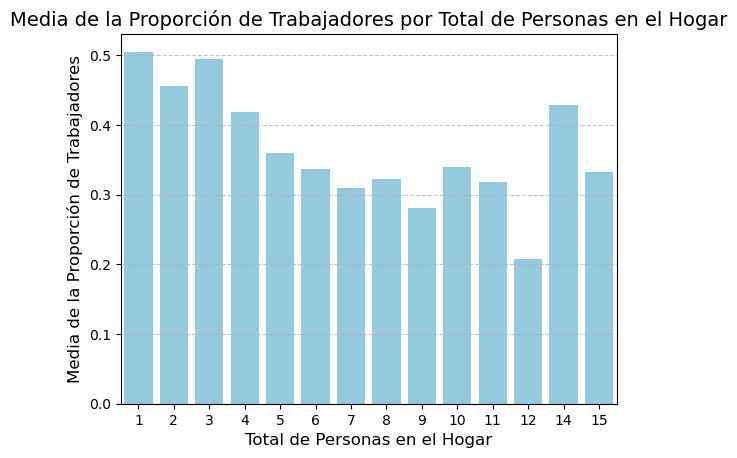

In [25]:
# Asegurarnos de que cada hogar esté representado una sola vez
hogares_unicos = df_completa[['codusu', 'nro_hogar', 'proporcion_trabajando', 'total_personas']].drop_duplicates(subset=['codusu', 'nro_hogar'])

# 0.000 865: Significa que hay 865 hogares donde la proporción de personas que trabajan es 0 (es decir, nadie trabaja en esos hogares).

# Agrupar por total_personas y calcular la media de la proporcion_trabajando
tabla_resumen = hogares_unicos.groupby('total_personas').agg(
    media_proporcion_trabajando=('proporcion_trabajando', 'mean'),
    cantidad_hogares=('codusu', 'size')
).reset_index()

# Ordenar por total_personas para mayor claridad
tabla_resumen = tabla_resumen.sort_values(by='total_personas')

# Mostrar la tabla
print(tabla_resumen)


# Crear un gráfico de barras para la media de la proporción de trabajadores
sns.barplot(data=tabla_resumen, x='total_personas', y='media_proporcion_trabajando', color='skyblue')

# Agregar etiquetas y título
plt.title('Media de la Proporción de Trabajadores por Total de Personas en el Hogar', fontsize=14)
plt.xlabel('Total de Personas en el Hogar', fontsize=12)
plt.ylabel('Media de la Proporción de Trabajadores', fontsize=12)

# Mostrar el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

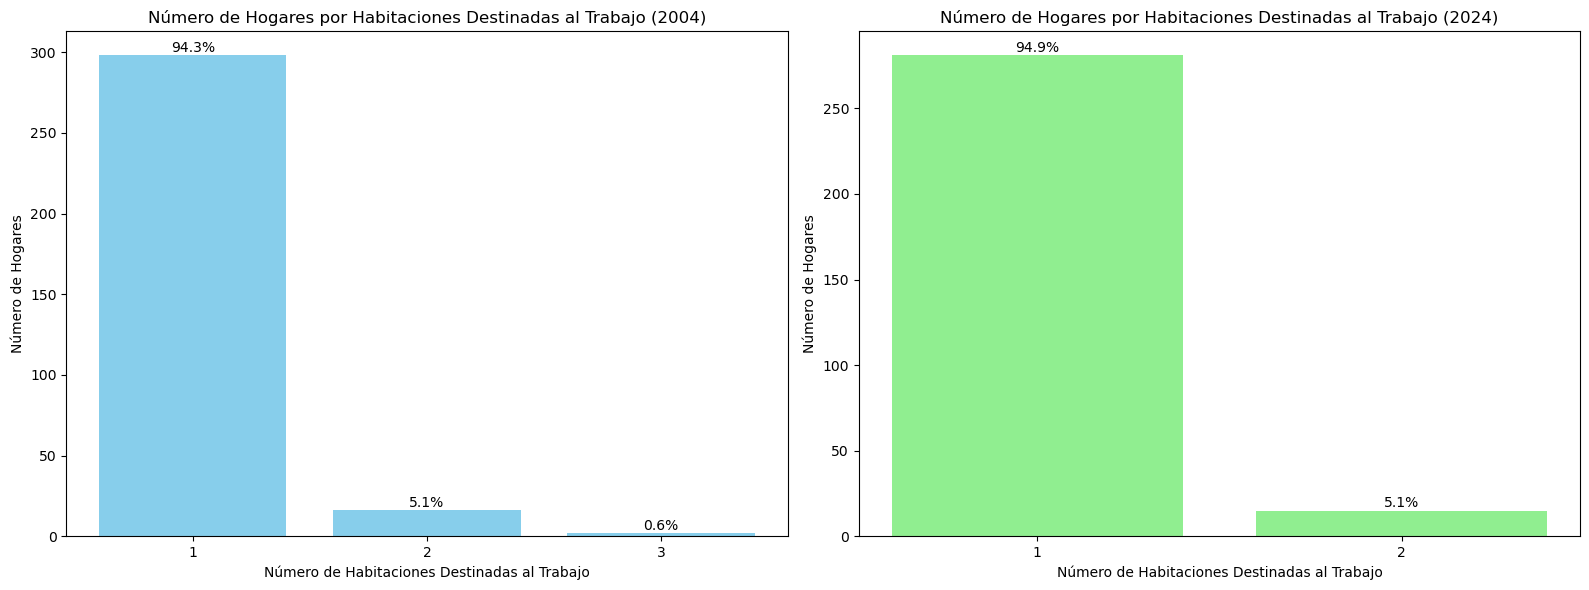


Resumen de Hogares por Habitaciones Destinadas al Trabajo (2024):
   ii3_1  cantidad_hogares  porcentaje
0      1               298        94.3
1      2                16         5.1
2      3                 2         0.6

Resumen de Hogares por Habitaciones Destinadas al Trabajo (2024):
   ii3_1  cantidad_hogares  porcentaje
0      1               281        94.9
1      2                15         5.1


In [26]:
# Filtrar los hogares por el año (asumiendo que tienes una columna 'ano4')
df_2004_limpio = df_completa[df_completa['ano4'] == 2004]
df_2024_limpio = df_completa[df_completa['ano4'] == 2024]
df_2004_limpio = df_2004_limpio.dropna(subset=['ii3_1'])
df_2024_limpio = df_2024_limpio.dropna(subset=['ii3_1'])

# Calcular la cantidad de hogares por número de habitaciones destinadas al trabajo en 2004
hogares_por_habitacion_trabajo_2004 = df_2004_limpio.groupby('ii3_1').size().reset_index(name='cantidad_hogares')
hogares_por_habitacion_trabajo_2004['porcentaje'] = (hogares_por_habitacion_trabajo_2004['cantidad_hogares'] / df_2004_limpio.shape[0]) * 100

# Filtrar para eliminar las filas con porcentaje 0
hogares_por_habitacion_trabajo_2004 = hogares_por_habitacion_trabajo_2004[hogares_por_habitacion_trabajo_2004['porcentaje'] > 0]


# Calcular la cantidad de hogares por número de habitaciones destinadas al trabajo en 2024
hogares_por_habitacion_trabajo_2024 = df_2024_limpio.groupby('ii3_1').size().reset_index(name='cantidad_hogares')
hogares_por_habitacion_trabajo_2024['porcentaje'] = (hogares_por_habitacion_trabajo_2024['cantidad_hogares'] / df_2024_limpio.shape[0]) * 100

# Convertir ii3_1 a enteros para el eje x
hogares_por_habitacion_trabajo_2004['ii3_1'] = hogares_por_habitacion_trabajo_2004['ii3_1'].astype(int)
hogares_por_habitacion_trabajo_2024['ii3_1'] = hogares_por_habitacion_trabajo_2024['ii3_1'].astype(int)

# Crear gráficos para 2004 y 2024
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # Crear dos gráficos en una fila

# Asegurarnos de que 'ii3_1' esté como enteros
hogares_por_habitacion_trabajo_2004['ii3_1'] = hogares_por_habitacion_trabajo_2004['ii3_1'].astype(int)
hogares_por_habitacion_trabajo_2024['ii3_1'] = hogares_por_habitacion_trabajo_2024['ii3_1'].astype(int)

# Forzar los ticks del eje x a los valores únicos de 'ii3_1'
ticks_2004 = hogares_por_habitacion_trabajo_2004['ii3_1'].unique()
ticks_2024 = hogares_por_habitacion_trabajo_2024['ii3_1'].unique()

# Gráfico para el año 2004
ax[0].bar(hogares_por_habitacion_trabajo_2004['ii3_1'], hogares_por_habitacion_trabajo_2004['cantidad_hogares'], color='skyblue')
ax[0].set_title('Número de Hogares por Habitaciones Destinadas al Trabajo (2004)')
ax[0].set_xlabel('Número de Habitaciones Destinadas al Trabajo')
ax[0].set_ylabel('Número de Hogares')
ax[0].set_xticks(ticks_2004)  # Establecer los ticks del eje x a los valores únicos

# Añadir los porcentajes sobre las barras
for i, row in hogares_por_habitacion_trabajo_2004.iterrows():
    ax[0].text(row['ii3_1'], row['cantidad_hogares'] + 2, f"{row['porcentaje']:.1f}%", ha='center')

# Gráfico para el año 2024
ax[1].bar(hogares_por_habitacion_trabajo_2024['ii3_1'], hogares_por_habitacion_trabajo_2024['cantidad_hogares'], color='lightgreen')
ax[1].set_title('Número de Hogares por Habitaciones Destinadas al Trabajo (2024)')
ax[1].set_xlabel('Número de Habitaciones Destinadas al Trabajo')
ax[1].set_ylabel('Número de Hogares')
ax[1].set_xticks(ticks_2024)  # Establecer los ticks del eje x a los valores únicos

# Añadir los porcentajes sobre las barras
for i, row in hogares_por_habitacion_trabajo_2024.iterrows():
    ax[1].text(row['ii3_1'], row['cantidad_hogares'] + 2, f"{row['porcentaje']:.1f}%", ha='center')


# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Resumen para el año 2004
resumen_2004 = hogares_por_habitacion_trabajo_2004[['ii3_1', 'cantidad_hogares', 'porcentaje']]
resumen_2004['porcentaje'] = resumen_2004['porcentaje'].round(1)  # Redondear los porcentajes a un decimal
resumen_2004 = resumen_2004.sort_values(by='ii3_1')  # Ordenar por el número de habitaciones
print("\nResumen de Hogares por Habitaciones Destinadas al Trabajo (2024):")
print(resumen_2004)


# Resumen para el año 2024
resumen_2024 = hogares_por_habitacion_trabajo_2024[['ii3_1', 'cantidad_hogares', 'porcentaje']]
resumen_2024['porcentaje'] = resumen_2024['porcentaje'].round(1)  # Redondear los porcentajes a un decimal
resumen_2024 = resumen_2024.sort_values(by='ii3_1')  # Ordenar por el número de habitaciones
print("\nResumen de Hogares por Habitaciones Destinadas al Trabajo (2024):")
print(resumen_2024)

In [27]:
print(df_completa.columns.tolist())

print("SIN NINGUN NAN:")
col_no_nan = df_completa.columns[df_completa.notna().all()]
col_no_nan_list = col_no_nan.tolist()
print(col_no_nan_list)


df_temporal = df_completa.dropna(subset=['ix_men10', 'v19_a'])
df_temporal = df_temporal[['ix_men10', 'v19_a', 'codusu', 'nro_hogar', 'componente','v19_b']]

# Verificar los tipos de datos de cada columna
print(df_temporal.dtypes)

print("Valores únicos de 'ix_men10':")
print(df_temporal['ix_men10'].unique())

df_temporal['v19_a'] = df_temporal['v19_a'].replace({'No': 2, 'Sí': 1})

# Verificar el resultado
print(df_temporal['v19_a'].unique())
# Verificar la cantidad de veces que aparece cada valor en 'v19_a'
print(df_temporal['v19_a'].value_counts())

print(df_temporal['v19_b'].value_counts())

['codusu', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv5', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1', 'ii7', 'v1', 'v2', 'v21', 'v22', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'ix_tot', 'ix_men10', 'ix_mayeq10', 'itf', 'decifr', 'idecifr', 'rdecifr', 'gdecifr', 'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3', 'vii2_4', 'componente', 'h15', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', '

C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\2758755987.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temporal['v19_a'] = df_temporal['v19_a'].replace({'No': 2, 'Sí': 1})


['codusu', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv5', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii3_1', 'ii7', 'v1', 'v2', 'v21', 'v22', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'ix_tot', 'ix_men10', 'ix_mayeq10', 'itf', 'decifr', 'idecifr', 'rdecifr', 'gdecifr', 'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3', 'vii2_4', 'componente', 'h15', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', '

C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\3658453755.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temporal['v19_a'] = df_temporal['v19_a'].replace({'No': 2, 'Sí': 1}).astype(int)


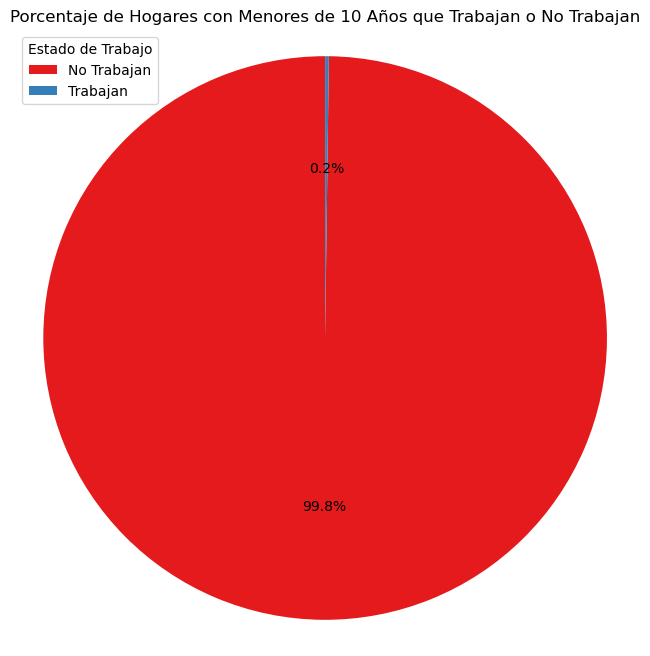

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar todas las columnas de df_completa
print(df_completa.columns.tolist())

# Imprimir las columnas que no tienen ningún NaN
print("SIN NINGUN NAN:")
col_no_nan = df_completa.columns[df_completa.notna().all()]
col_no_nan_list = col_no_nan.tolist()
print(col_no_nan_list)

# Filtrar y limpiar el DataFrame
df_temporal = df_completa.dropna(subset=['ix_men10', 'v19_a'])
df_temporal = df_temporal[['ix_men10', 'v19_a', 'codusu', 'nro_hogar', 'componente', 'v19_b']]

# Reemplazar los valores de 'v19_a' de 'No' y 'Sí' por 2 y 1 respectivamente
df_temporal['v19_a'] = df_temporal['v19_a'].replace({'No': 2, 'Sí': 1}).astype(int)

# Filtrar los hogares con menores de 10 años
df_menores_10 = df_temporal[df_temporal['ix_men10'] >= 1]

# Crear una columna adicional para "trabajo"
df_menores_10.loc[:, 'trabajo'] = df_menores_10['v19_a']  # 1 para 'Sí' (trabaja), 2 para 'No' (no trabaja)

# Calcular los porcentajes de hogares que trabajan y no trabajan
trabajo_counts = df_menores_10['trabajo'].value_counts(normalize=True) * 100

# Reemplazar 1 y 2 por etiquetas
trabajo_counts.index = ['Trabajan' if x == 1 else 'No Trabajan' for x in trabajo_counts.index]

# Crear un gráfico de torta (pie chart) con los porcentajes
plt.figure(figsize=(8, 8))
plt.pie(trabajo_counts, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set1", n_colors=2))

# Configuración del gráfico
plt.title('Porcentaje de Hogares con Menores de 10 Años que Trabajan o No Trabajan')
plt.axis('equal')  # Para que el gráfico sea un círculo perfecto

# Añadir leyenda para explicar los colores
plt.legend(trabajo_counts.index, title='Estado de Trabajo', loc='upper left')

plt.show()


C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\4219528048.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_trabajan.loc[:, 'limosna'] = df_trabajan['v19_b'].replace({'No': 2, 'Sí': 1}).astype(int)
C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\4219528048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trabajan.loc[:, 'limosna'] = df_trabajan['v19_b'].replace({'No': 2, 'Sí': 1}).astype(int)
C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\4219528048.py:15: FutureWarning: 

Passing `palette` without assi

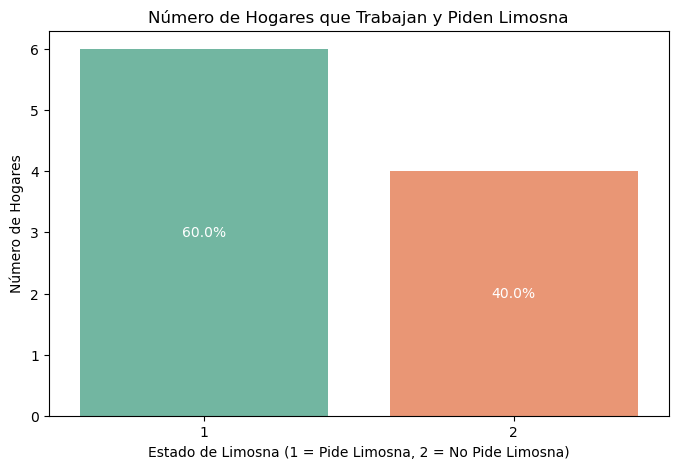

In [29]:

# Filtrar los hogares que trabajan
df_trabajan = df_menores_10[df_menores_10['trabajo'] == 1]

# Crear una columna adicional para "limosna"
df_trabajan.loc[:, 'limosna'] = df_trabajan['v19_b'].replace({'No': 2, 'Sí': 1}).astype(int)

# Calcular los conteos absolutos de limosna entre los hogares que trabajan
limosna_counts = df_trabajan['limosna'].value_counts()

# Calcular los porcentajes de limosna entre los hogares que trabajan
limosna_percentage = (limosna_counts / limosna_counts.sum()) * 100

# Crear un gráfico de barras con los conteos absolutos de limosna entre los hogares que trabajan
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=limosna_counts.index, y=limosna_counts.values, palette="Set2")

# Configuración del gráfico
plt.title('Número de Hogares que Trabajan y Piden Limosna')
plt.xlabel('Estado de Limosna (1 = Pide Limosna, 2 = No Pide Limosna)')
plt.ylabel('Número de Hogares')

# Colocar los porcentajes en el centro de las barras
for i, v in enumerate(limosna_counts.values):
    ax.text(i, v / 2, f'{limosna_percentage.iloc[i]:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Mostrar el gráfico
plt.show()

### Clasificación y regularización

#### 2024

##### Preparación de la base

VOY a buscar la tabla de respondieron para agarrar las dummys.

In [172]:
# Base solo datos 2024
df_prediccion_2024 = df_completa[df_completa['ano4'] == 2024]

datos_respondieron_2024_individual = pd.read_csv('2024_respondieron.csv', low_memory=False)

In [173]:
# Obtener las columnas con valores NaN
columnas_con_na = df_prediccion_2024.isna().sum()

# Crear una lista de las columnas que tienen NaN
columnas_con_na_lista = columnas_con_na[columnas_con_na > 0].index.tolist()

# Imprimir la lista
print(columnas_con_na_lista)
# Eliminar columnas con NaN 
df_prediccion_2024 = df_prediccion_2024.dropna(axis=1)

columnas_con_na = df_prediccion_2024.isna().sum()

# Crear una lista de las columnas que tienen NaN
columnas_con_na_lista = columnas_con_na[columnas_con_na > 0].index.tolist()

# Imprimir la lista
print(columnas_con_na_lista)

['iv1_esp', 'ii3_1', 'ix_tot', 'ix_men10', 'ix_mayeq10', 'idecifr', 'pdecifr', 'ideccfr', 'pdeccfr', 'h15', 'ch03', 'ch08', 'ch14', 'ch15_cod', 'ch16_cod', 'cat_inac', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', 'pp09a', 'pp09a_esp', 'pp09b', 'pp09c', 'pp09c_esp', 'pp10a', 'pp10c', 'pp10d', 'pp10e', 'pp11a', 'pp11b_cod', 'pp11b1', 'pp11b2_mes', 'pp11b2_ano', 'pp11b2_dia', 'pp11c', 'pp11c99', 'pp11d_cod', 'pp11g_ano', 'pp11g_mes', 'pp1

In [174]:
print(df_prediccion_2024.columns.tolist())
columnas_a_borrar = ['ch06','ch04', 'ch07', 'ch08','nivel_ed', 'ipcf','ano4','cat_ocup','trimestre', 'region', 'mas_500', 'aglomerado', 'v4', 'vii2_4', 'ch11', 'estado', 'pondera']

# Eliminar las columnas con los nombres especificados
df_prediccion_2024 = df_prediccion_2024.drop(columns=[col for col in df_prediccion_2024.columns if any(sub in col for sub in columnas_a_borrar)])

# Verificar que las columnas fueron eliminadas
print(df_prediccion_2024.columns.tolist())



# ELIMINAMOS COLUMNAS QUE TIENEN DATOS NO ANALIZABLES YA TENEMOS MUY POCAS FILAS

# Convertir todas las columnas a numéricas (excepto 'codusu')
df_prediccion_2024 = df_prediccion_2024.apply(
    lambda col: pd.to_numeric(col, errors='coerce') if col.name != 'codusu' else col
)

columnas_excluidas = ['componente', 'decocur', 'rdecocur', 'gdecocur', 'adecocur', 
                      'desocupado', 'proporcion_trabajando', 'total_personas', 
                      'tasa_parcial', 'prom_edad_hogar']



# Verificar las columnas que contienen los valores 0, 9 o 99, excluyendo las columnas específicas
columnas_a_eliminar = [col for col in df_prediccion_2024.columns 
                       if col not in columnas_excluidas and df_prediccion_2024[col].isin([0, 9, 99]).any()]

# Filtrar columnas que realmente existan en el DataFrame antes de intentar eliminarlas
columnas_a_eliminar_existentes = [col for col in columnas_a_eliminar if col in df_prediccion_2024.columns]

# Eliminar las columnas que contienen valores 0, 9 o 99, excluyendo las columnas especificadas
df_prediccion_2024 = df_prediccion_2024.drop(columns=columnas_a_eliminar_existentes)


# Verificar las columnas restantes
print(df_prediccion_2024.columns.tolist())

['codusu', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv5', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii7', 'v1', 'v2', 'v21', 'v22', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'itf', 'decifr', 'rdecifr', 'gdecifr', 'adecifr', 'ipcf', 'deccfr', 'rdeccfr', 'gdeccfr', 'adeccfr', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3', 'vii2_4', 'componente', 'ch04', 'ch06', 'ch07', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch15', 'ch16', 'nivel_ed', 'estado', 'cat_ocup', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'decocur', 'rdecocur', 'gdecocur', 'adecocur', 'desocupado', 'proporcion_trabajando', 'total_personas', 'tasa_parcial', 'prom_edad_hogar']
['codusu', 'nro_hogar', 'realizada', 'iv1', 'iv5', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii7', 'v1', 'v2', 'v21', 'v22', 'v3',

In [175]:
#columnas_a_chequear = ['codusu', 'nro_hogar', 'realizada', 'pondera', 'iv1', 'iv5', 'iv12_1', 'iv12_2', 'iv12_3', 'v1', 'v2', 'v21', 'v22', 'v3', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'itf', 'vii2_1', 'componente', 'ch16', 'estado', 'decocur', 'rdecocur', 'gdecocur', 'adecocur', 'desocupado', 'proporcion_trabajando', 'total_personas', 'tasa_parcial', 'prom_edad_hogar']

# Verificar qué columnas existen realmente en el DataFrame
#columnas_existentes = [columna for columna in columnas_a_chequear if columna in df_prediccion_2024.columns]

# Iterar sobre las columnas existentes y mostrar los valores únicos
#for columna in columnas_existentes:
#    print(f"Valores únicos en la columna '{columna}':")
#    print(df_prediccion_2024[columna].unique())
#    print("\n")

In [176]:
# Verificar si las columnas 'codusu' y 'nro_hogar' están en ambos DataFrames
df_prediccion_2024['componente'] = df_prediccion_2024['componente'].astype('int64')
columnas_requeridas = ['codusu', 'nro_hogar', 'componente']

df_prediccion_2024 = pd.merge(df_prediccion_2024, datos_respondieron_2024_individual, on=columnas_requeridas, how='inner')

In [177]:
# Eliminar columnas que comienzan con 'estado_' o 'inactividad_'
df_prediccion_2024 = df_prediccion_2024.drop(
    df_prediccion_2024.filter(regex='^estado_').columns, axis=1
)
df_prediccion_2024 = df_prediccion_2024.drop(
    df_prediccion_2024.filter(regex='^inactividad_').columns, axis=1
)
df_prediccion_2024 = df_prediccion_2024.drop(['codusu', 'nro_hogar', 'realizada'], axis=1)

In [178]:
non_numeric_columns = df_prediccion_2024.select_dtypes(exclude=['int64', 'float64']).columns

# Imprimir las columnas que no son numéricas
print(non_numeric_columns)

Index(['tasa_parcial'], dtype='object')


In [179]:
# Suponiendo que df_temporal es tu DataFrame específico
columnas_a_dummy = ['iv1', 'iv5', 'iv12_1', 'iv12_2', 'iv12_3', 'v1', 'v2', 'v21', 'v22', 'v3', 'v5', 'v6', 'v7', 
                    'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 
                    'itf', 'vii2_1', 'componente', 'ch16']

# Filtrar solo las columnas necesarias
df_seleccionado = df_prediccion_2024[columnas_a_dummy]

# Convertir esas columnas a variables dummy, eliminando la primera categoría para evitar multicolinealidad
df_dummies = pd.get_dummies(df_seleccionado, drop_first=True)
df_dummies = df_dummies.astype(int)
# Reemplazar el DataFrame original con las columnas dummy (sin las originales)
df_prediccion_2024 = pd.concat([df_prediccion_2024.drop(columns=columnas_a_dummy), df_dummies], axis=1)


In [180]:
df_prediccion_2024

,decocur,rdecocur,gdecocur,adecocur,desocupado,proporcion_trabajando,total_personas,tasa_parcial,prom_edad_hogar,edad,...,v15,v16,v17,v18,v19_a,v19_b,itf,vii2_1,componente,ch16
0,6,5,6.0,3,0,1.000,1,0,37.00,37,...,2,1,2,2,2,2,290000,98,1,1
1,10,10,10.0,9,0,1.000,2,0,63.50,65,...,2,1,2,2,2,2,1900000,98,1,1
2,7,6,6.0,4,0,1.000,2,0,63.50,62,...,2,1,2,2,2,2,1900000,98,2,1
3,0,0,0.0,0,0,0.000,1,0,69.00,69,...,2,2,2,2,2,2,67500,98,1,1
4,10,10,10.0,9,0,1.000,1,0,48.00,48,...,2,2,2,2,2,2,800000,98,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,1,1,1.0,2,0,0.750,4,0,33.25,38,...,1,1,1,2,2,2,339000,98,4,1
3892,8,8,8.0,8,0,1.000,1,0,24.00,24,...,2,1,2,2,2,2,740000,98,1,1
3893,0,0,0.0,0,0,0.333,3,0,62.00,73,...,1,2,1,2,2,2,585000,3,1,1
3894,0,0,0.0,0,0,0.333,3,0,62.00,68,...,1,2,1,2,2,2,585000,3,2,1


##### Predicciones

In [181]:
print(df_prediccion_2024.columns.tolist())

['decocur', 'rdecocur', 'gdecocur', 'adecocur', 'desocupado', 'proporcion_trabajando', 'total_personas', 'tasa_parcial', 'prom_edad_hogar', 'edad', 'ingreso', 'varon', 'mujer', 'con_pareja', 'sin_pareja', 'si_cobertura', 'no_cobertura', 'prim_inc', 'prim_com', 'sec_inc', 'sec_com', 'uni_inc', 'uni_comp', 'sin_instrucc', 'iv1', 'iv5', 'iv12_1', 'iv12_2', 'iv12_3', 'v1', 'v2', 'v21', 'v22', 'v3', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'itf', 'vii2_1', 'componente', 'ch16']


In [182]:
from sklearn.preprocessing import StandardScaler

# 1. Dividir los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
train, test = train_test_split(df_prediccion_2024, test_size=0.3, random_state=101)

# 2. Separar la variable dependiente (target) 'desocupado' en y_train (y_test para prueba)
y_train = train['desocupado']  # Esta es la variable que queremos predecir
y_test = test['desocupado']  # Lo mismo para el conjunto de prueba

# 3. Separar las características (features) que NO son 'desocupado'
X_train = train.drop(columns='desocupado')  # Eliminar 'desocupado' de las características
X_test = test.drop(columns='desocupado')  # Eliminar 'desocupado' del conjunto de prueba

# 4. Agregar la columna de intercepto (unos) a las características de entrenamiento y prueba
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])  # con NumPy
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values])  # con NumPy


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Regularización L1 (LASSO)
model_lasso = LogisticRegression(penalty='l1', C=1, solver='liblinear', random_state=101)
model_lasso.fit(X_train, y_train)

# Regularización L2 (Ridge)
model_ridge = LogisticRegression(penalty='l2', C=1, solver='liblinear', random_state=101)
model_ridge.fit(X_train, y_train)

# Predicciones
y_pred_lasso = model_lasso.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

# Matriz de confusión
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)

print("Matriz de Confusión LASSO:\n", conf_matrix_lasso)
print("Matriz de Confusión Ridge:\n", conf_matrix_ridge)

Matriz de Confusión LASSO:
 [[1113   12]
 [  35    9]]
Matriz de Confusión Ridge:
 [[1125    0]
 [  44    0]]


1113 Verdaderos negativos (TN): Son 1113 instancias donde el modelo correctamente predijo la clase negativa (es decir, clasificó correctamente como ocupados).

12 Falsos positivos (FP): Son 12 instancias donde el modelo predijo incorrectamente que la clase era positiva (desocupado) cuando en realidad era negativa.

35 Falsos negativos (FN): Son 35 instancias donde el modelo predijo incorrectamente que la clase era negativa (ocupado) cuando en realidad era positiva.

9 Verdaderos positivos (TP): Son 9 instancias donde el modelo correctamente predijo la clase positiva (desocupado).

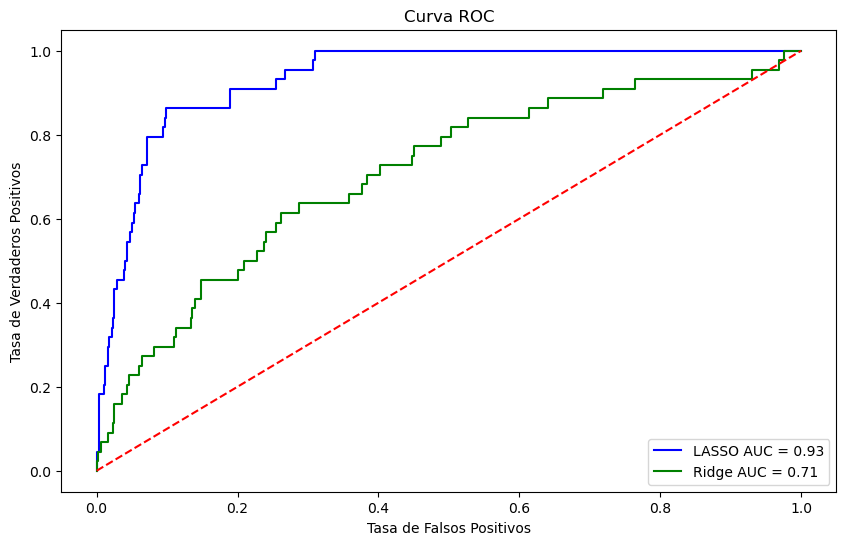

In [184]:
y_prob_lasso = model_lasso.predict_proba(X_test)[:, 1]
y_prob_ridge = model_ridge.predict_proba(X_test)[:, 1]

# Curva ROC
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_prob_lasso)
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_prob_ridge)

# AUC
auc_lasso = auc(fpr_lasso, tpr_lasso)
auc_ridge = auc(fpr_ridge, tpr_ridge)

# Graficar la curva ROC
plt.figure(figsize=(10,6))
plt.plot(fpr_lasso, tpr_lasso, color='blue', label=f'LASSO AUC = {auc_lasso:.2f}')
plt.plot(fpr_ridge, tpr_ridge, color='green', label=f'Ridge AUC = {auc_ridge:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [185]:
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

print("Accuracy LASSO:", accuracy_lasso)
print("Accuracy Ridge:", accuracy_ridge)

Accuracy LASSO: 0.9597946963216424
Accuracy Ridge: 0.962360992301112


In [186]:
# Definir valores de λ (equivalente a alpha en sklearn)
lambdas = [10**n for n in range(-5, 6)]  # valores de λ desde 10^(-5) hasta 10^5
ridge_errors = []  # Para almacenar los errores de Ridge
lasso_errors = []  # Para almacenar los errores de Lasso

ridge_coefs = []  # Para almacenar coeficientes de Ridge
lasso_proportions = []  # Para almacenar las proporciones de coeficientes nulos (Lasso)

for lambda_value in lambdas:
    # Regresión Ridge
    ridge_model = LogisticRegression(penalty='l2', C=1/lambda_value, solver='liblinear')
    ridge_cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
    ridge_errors.append(-ridge_cv_scores)  # MSE es negativo por la forma en que se calcula, lo revertimos
    
    # Regresión LASSO
    lasso_model = LogisticRegression(penalty='l1', C=1/lambda_value, solver='liblinear')
    lasso_cv_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
    lasso_errors.append(-lasso_cv_scores)
    
    # Para Lasso, calculamos la proporción de coeficientes nulos
    lasso_model.fit(X_train_scaled, y_train)
    lasso_coefs = lasso_model.coef_.flatten()
    lasso_proportion = np.mean(lasso_coefs == 0)  # Proporción de coeficientes cero
    lasso_proportions.append(lasso_proportion)

C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\sit

λ = 1.0e-05 | Ridge Mean MSE = 0.0509 | Ridge Std Dev = 0.0148 | Lasso Mean MSE = 0.0506 | Lasso Std Dev = 0.0148
λ = 1.0e-04 | Ridge Mean MSE = 0.0523 | Ridge Std Dev = 0.0162 | Lasso Mean MSE = 0.0503 | Lasso Std Dev = 0.0154
λ = 1.0e-03 | Ridge Mean MSE = 0.0583 | Ridge Std Dev = 0.0167 | Lasso Mean MSE = 0.0573 | Lasso Std Dev = 0.0163
λ = 1.0e-02 | Ridge Mean MSE = 0.0533 | Ridge Std Dev = 0.0127 | Lasso Mean MSE = 0.0526 | Lasso Std Dev = 0.0125
λ = 1.0e-01 | Ridge Mean MSE = 0.0606 | Ridge Std Dev = 0.0136 | Lasso Mean MSE = 0.0619 | Lasso Std Dev = 0.0129
λ = 1.0e+00 | Ridge Mean MSE = 0.0563 | Ridge Std Dev = 0.2725 | Lasso Mean MSE = 0.0559 | Lasso Std Dev = 0.2725
λ = 1.0e+01 | Ridge Mean MSE = 0.0446 | Ridge Std Dev = 2.8739 | Lasso Mean MSE = 0.0446 | Lasso Std Dev = 2.8739
λ = 1.0e+02 | Ridge Mean MSE = 0.0638 | Ridge Std Dev = 28.8491 | Lasso Mean MSE = 0.0612 | Lasso Std Dev = 28.8499
λ = 1.0e+03 | Ridge Mean MSE = 0.0528 | Ridge Std Dev = 288.6599 | Lasso Mean MSE = 0.

C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\2886494811.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lambda', y='value', data=pd.melt(ridge_errors_df, id_vars='lambda'), palette="Set2")


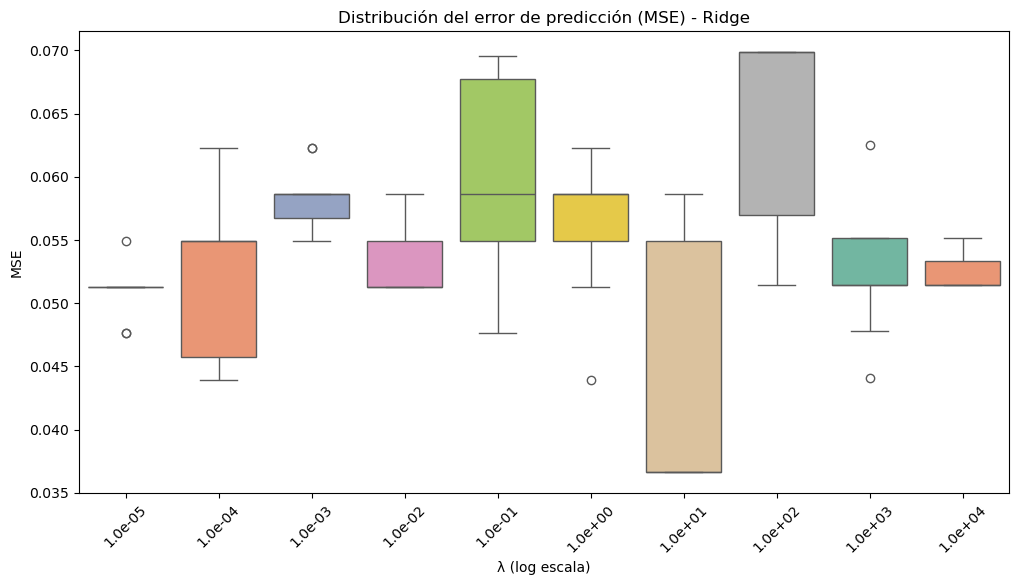

C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\2886494811.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lambda', y='value', data=pd.melt(lasso_errors_df, id_vars='lambda'), palette="Set1")


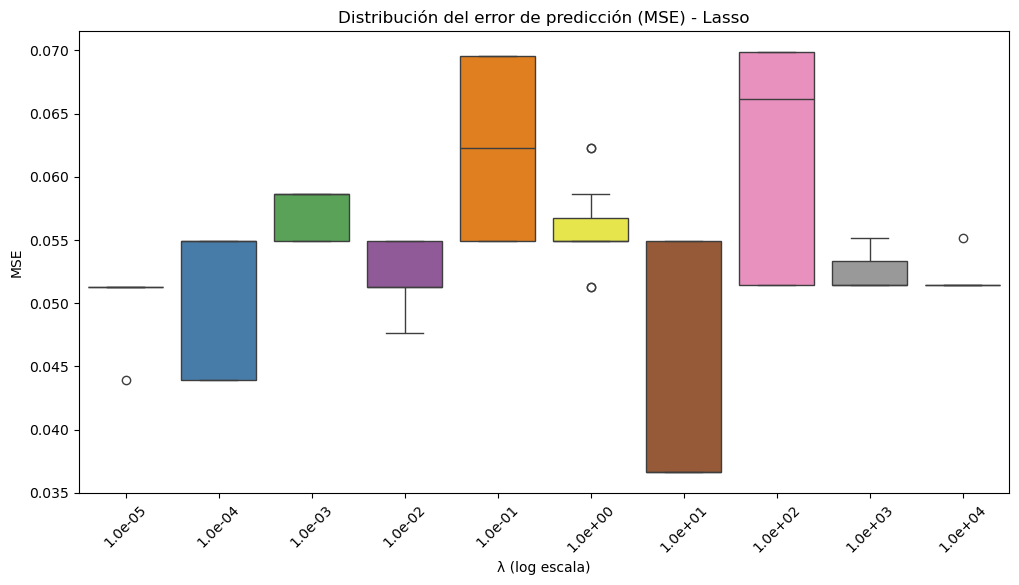

In [189]:
# Convertir los errores a un DataFrame
ridge_errors_df = pd.DataFrame(ridge_errors).T
lasso_errors_df = pd.DataFrame(lasso_errors).T

# Promediar los errores de Ridge y Lasso
ridge_errors_mean = np.mean(ridge_errors_df, axis=1)
lasso_errors_mean = np.mean(lasso_errors_df, axis=1)

# Si lambdas tiene 11 valores, pero solo 10 son utilizados:
lambdas = lambdas[:10]  # Ajustar el tamaño de lambdas a 10

# Ahora agregamos la columna 'lambda' a cada DataFrame
ridge_errors_df['lambda'] = lambdas
lasso_errors_df['lambda'] = lambdas

results_df = pd.DataFrame({
    'Lambda': lambdas,
    'Ridge Mean MSE': ridge_errors_mean,
    'Ridge Std Dev': ridge_errors_df.std(axis=1),
    'Lasso Mean MSE': lasso_errors_mean,
    'Lasso Std Dev': lasso_errors_df.std(axis=1)
})

for index, row in results_df.iterrows():
    print(f"λ = {row['Lambda']:.1e} | Ridge Mean MSE = {row['Ridge Mean MSE']:.4f} | Ridge Std Dev = {row['Ridge Std Dev']:.4f} | "
          f"Lasso Mean MSE = {row['Lasso Mean MSE']:.4f} | Lasso Std Dev = {row['Lasso Std Dev']:.4f}")

# Boxplot de errores de Ridge
plt.figure(figsize=(12, 6))
sns.boxplot(x='lambda', y='value', data=pd.melt(ridge_errors_df, id_vars='lambda'), palette="Set2")
plt.title('Distribución del error de predicción (MSE) - Ridge')
plt.xlabel('λ (log escala)')
plt.ylabel('MSE')
plt.xticks(ticks=range(len(lambdas)), labels=[f'{x:.1e}' for x in lambdas], rotation=45)
plt.show()

# Boxplot de errores de Lasso
plt.figure(figsize=(12, 6))
sns.boxplot(x='lambda', y='value', data=pd.melt(lasso_errors_df, id_vars='lambda'), palette="Set1")
plt.title('Distribución del error de predicción (MSE) - Lasso')
plt.xlabel('λ (log escala)')
plt.ylabel('MSE')
plt.xticks(ticks=range(len(lambdas)), labels=[f'{x:.1e}' for x in lambdas], rotation=45)
plt.show()

Con valores pequeños de  λ, los modelos tienden a tener menos regularización, lo que puede llevar a un sobreajuste (overfitting). Esto generalmente se traduce en un MSE más bajo, pero la variabilidad del error puede ser alta.
Con valores grandes de  𝜆, el modelo se vuelve más regularizado y las predicciones tienden a ser más simples, lo que puede aumentar el error (MSE) pero reduce la variabilidad, ya que el modelo es menos propenso a sobreajustarse.
Comparación entre Ridge y Lasso:

Ridge: En el modelo Ridge, la regularización penaliza todos los coeficientes del modelo, pero no los hace cero (a diferencia de Lasso). Esto puede resultar en un MSE más uniforme a través de los valores de  𝜆

Lasso: En Lasso, los coeficientes de algunas variables se reducen a cero, lo que puede llevar a un modelo más simple, pero también más sensible a la elección de 𝜆. Es posible que veas que el MSE de  Lasso varía más drásticamente entre los diferentes valores de 𝜆


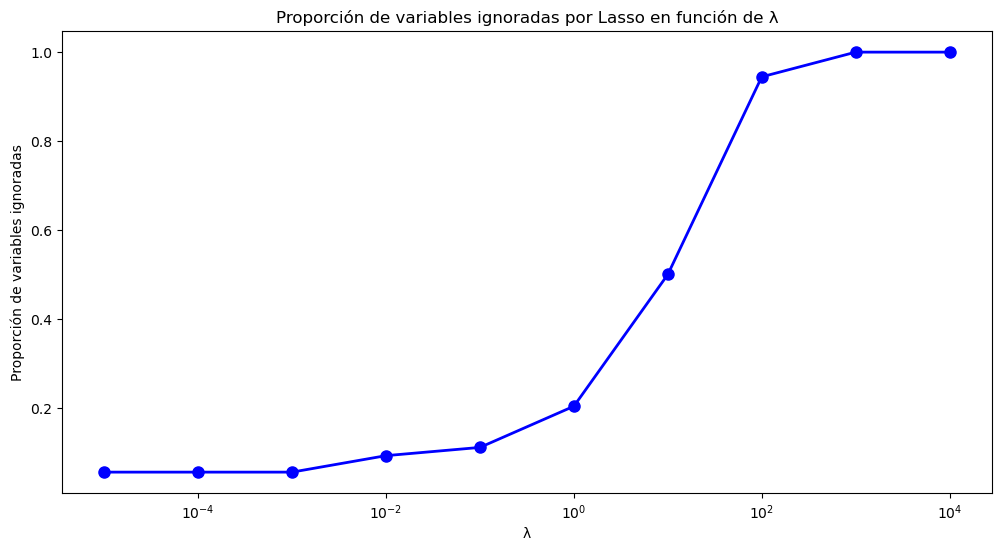

In [190]:
min_len = min(len(lambdas), len(lasso_proportions))
lambdas = lambdas[:min_len]
lasso_proportions = lasso_proportions[:min_len]

# Ahora, puedes hacer el gráfico
plt.figure(figsize=(12, 6))
plt.plot(lambdas, lasso_proportions, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xscale('log')
plt.title('Proporción de variables ignoradas por Lasso en función de λ')
plt.xlabel('λ')
plt.ylabel('Proporción de variables ignoradas')
plt.show()

Al principio, cuando λ es pequeño, el modelo mantiene la mayoría de las variables, por lo que la proporción de variables ignoradas es baja (alrededor de 0% o un valor muy pequeño).
A medida que  λ aumenta, más variables son ignoradas, lo que hace que la proporción de variables ignoradas aumente.
Cuando  λ es muy grande, casi todas las variables son ignoradas, y la proporción se acerca a 100%.

In [191]:
optimal_lambda_index = np.argmin(lasso_errors_mean)  # Índice del λ que minimiza el error
optimal_lambda = lambdas[optimal_lambda_index]  # El valor de λ óptimo

# Ahora entrenamos el modelo Lasso con el valor óptimo de λ
lasso_model_optimal = LogisticRegression(penalty='l1', C=1/optimal_lambda, solver='liblinear')
lasso_model_optimal.fit(X_train_scaled, y_train)

# Obtener los coeficientes del modelo
lasso_coefs = lasso_model_optimal.coef_.flatten()

# Identificar las variables cuyo coeficiente es 0 (es decir, las descartadas)
discarded_variables = df_prediccion_2024.columns[lasso_coefs == 0]

# Imprimir las variables descartadas
print(f"Variables descartadas por Lasso con λ = {optimal_lambda}:")
print(discarded_variables)


Variables descartadas por Lasso con λ = 10:
Index(['decocur', 'gdecocur', 'total_personas', 'tasa_parcial',
       'prom_edad_hogar', 'ingreso', 'con_pareja', 'sin_pareja', 'prim_inc',
       'uni_inc', 'uni_comp', 'sin_instrucc', 'iv5', 'iv12_1', 'iv12_2', 'v21',
       'v22', 'v7', 'v12', 'v13', 'v15', 'v16', 'v18', 'v19_a', 'v19_b', 'itf',
       'ch16'],
      dtype='object')


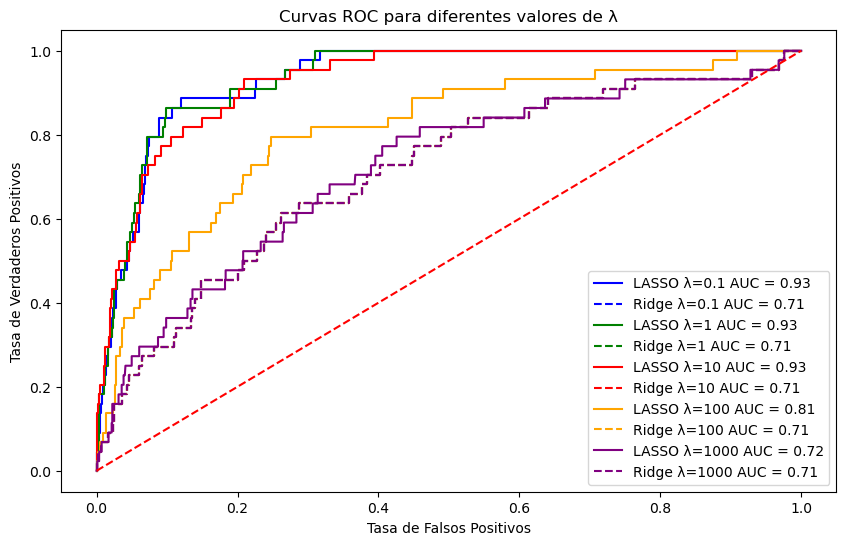

In [192]:
# Definir diferentes valores de λ (esto se traduce en diferentes valores de C)
lambdas = [0.1, 1, 10, 100, 1000]
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Inicializar el gráfico
plt.figure(figsize=(10,6))

for i, lambda_value in enumerate(lambdas):
    # LASSO (L1 regularization)
    model_lasso = LogisticRegression(penalty='l1', C=1/lambda_value, solver='liblinear', random_state=101)
    model_lasso.fit(X_train, y_train)

    # Ridge (L2 regularization)
    model_ridge = LogisticRegression(penalty='l2', C=1/lambda_value, solver='liblinear', random_state=101)
    model_ridge.fit(X_train, y_train)

    # Predicciones
    y_prob_lasso = model_lasso.predict_proba(X_test)[:, 1]
    y_prob_ridge = model_ridge.predict_proba(X_test)[:, 1]

    # Curva ROC
    fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_prob_lasso)
    fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_prob_ridge)

    # AUC
    auc_lasso = auc(fpr_lasso, tpr_lasso)
    auc_ridge = auc(fpr_ridge, tpr_ridge)

    # Graficar la curva ROC para LASSO y Ridge
    plt.plot(fpr_lasso, tpr_lasso, color=colors[i], label=f'LASSO λ={lambda_value} AUC = {auc_lasso:.2f}')
    plt.plot(fpr_ridge, tpr_ridge, color=colors[i], linestyle='--', label=f'Ridge λ={lambda_value} AUC = {auc_ridge:.2f}')

# Línea diagonal (para referencia)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  

# Etiquetas y título
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para diferentes valores de λ')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

#### 2004

##### Preparación de la Base

In [147]:
# Base solo datos 2004
df_prediccion_2004 = df_completa[df_completa['ano4'] == 2004]

datos_respondieron_2004_individual = pd.read_csv('2004_respondieron.csv', low_memory=False)

In [148]:
# Obtener las columnas con valores NaN
columnas_con_na = df_prediccion_2004.isna().sum()

# Crear una lista de las columnas que tienen NaN
columnas_con_na_lista = columnas_con_na[columnas_con_na > 0].index.tolist()

# Imprimir la lista
print(columnas_con_na_lista)
# Eliminar columnas con NaN 
df_prediccion_2004 = df_prediccion_2004.dropna(axis=1)

columnas_con_na = df_prediccion_2004.isna().sum()

# Crear una lista de las columnas que tienen NaN
columnas_con_na_lista = columnas_con_na[columnas_con_na > 0].index.tolist()

# Imprimir la lista
print(columnas_con_na_lista)

['ii3_1', 'ix_tot', 'ix_men10', 'ix_mayeq10', 'h15', 'ch03', 'ch08', 'cat_inac', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp06c', 'pp06d', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', 'pp09b', 'pp09c', 'pp11b2_mes', 'pp11b2_ano', 'pp11b2_dia', 'pp11g_ano', 'pp11g_mes', 'pp11g_dia', 'p21', 'tot_p12', 'p47t', 'decindr', 'rdecindr', 'gdecindr', 'adecindr', 'v2_m', 'v3_m', 'v4_m', 'v5_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m', 'v12_m', 'v18_m', 'v19_am', 'v21_m', 't_vi']
[]


In [149]:
print(df_prediccion_2004.columns.tolist())
columnas_a_borrar = ['ch06','ch04', 'ch07', 'ch08','nivel_ed', 'ipcf','ano4','cat_ocup','trimestre', 'region', 'mas_500', 'aglomerado', 'v4', 'vii2_4', 'ch11', 'estado', 'pondera']

# Eliminar las columnas con los nombres especificados
df_prediccion_2004 = df_prediccion_2004.drop(columns=[col for col in df_prediccion_2004.columns if any(sub in col for sub in columnas_a_borrar)])

# Verificar que las columnas fueron eliminadas
print(df_prediccion_2004.columns.tolist())



# ELIMINAMOS COLUMNAS QUE TIENEN DATOS NO ANALIZABLES YA TENEMOS MUY POCAS FILAS

# Convertir todas las columnas a numéricas (excepto 'codusu')
df_prediccion_2004 = df_prediccion_2004.apply(
    lambda col: pd.to_numeric(col, errors='coerce') if col.name != 'codusu' else col
)

columnas_excluidas = ['componente', 'decocur', 'rdecocur', 'gdecocur', 'adecocur', 
                      'desocupado', 'proporcion_trabajando', 'total_personas', 
                      'tasa_parcial', 'prom_edad_hogar']



# Verificar las columnas que contienen los valores 0, 9 o 99, excluyendo las columnas específicas
columnas_a_eliminar = [col for col in df_prediccion_2004.columns 
                       if col not in columnas_excluidas and df_prediccion_2004[col].isin([0, 9, 99]).any()]

# Filtrar columnas que realmente existan en el DataFrame antes de intentar eliminarlas
columnas_a_eliminar_existentes = [col for col in columnas_a_eliminar if col in df_prediccion_2004.columns]

# Eliminar las columnas que contienen valores 0, 9 o 99, excluyendo las columnas especificadas
df_prediccion_2004 = df_prediccion_2004.drop(columns=columnas_a_eliminar_existentes)


# Verificar las columnas restantes
print(df_prediccion_2004.columns.tolist())

['codusu', 'nro_hogar', 'realizada', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'iv1', 'iv1_esp', 'iv5', 'iv12_1', 'iv12_2', 'iv12_3', 'ii1', 'ii2', 'ii3', 'ii7', 'v1', 'v2', 'v21', 'v22', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19_a', 'v19_b', 'itf', 'decifr', 'idecifr', 'rdecifr', 'gdecifr', 'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr', 'vii1_1', 'vii1_2', 'vii2_1', 'vii2_2', 'vii2_3', 'vii2_4', 'componente', 'ch04', 'ch06', 'ch07', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'p

In [150]:
df_prediccion_2004

,codusu,nro_hogar,realizada,iv1,iv1_esp,iv5,v1,v2,v21,v22,...,gdecocur,pdecocur,adecocur,idecindr,pdecindr,desocupado,proporcion_trabajando,total_personas,tasa_parcial,prom_edad_hogar
0,125098,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0.000,1,0,79.0
1,125515,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0.000,1,0,74.0
2,125558,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,9.0,NaN,NaN,0,0.750,4,0,37.5
3,125558,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0.750,4,0,37.5
4,125558,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,0,0.750,4,0,37.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,288171,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0.333,3,0,21.0
7246,288405,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,0,0.750,4,0,35.0
7247,288405,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,0,0.750,4,0,35.0
7248,288405,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0.750,4,0,35.0


In [151]:
# Verificar si las columnas 'codusu' y 'nro_hogar' están en ambos DataFrames

df_prediccion_2004 = df_prediccion_2004.dropna(subset=['componente'])
df_prediccion_2004 = df_prediccion_2004[df_prediccion_2004['componente'] != 'Servicio doméstico en hogares']
df_prediccion_2004['componente'] = df_prediccion_2004['componente'].astype('float64')
datos_respondieron_2004_individual = datos_respondieron_2004_individual[datos_respondieron_2004_individual['componente'] != 'Servicio doméstico en hogares']
datos_respondieron_2004_individual['componente'] = datos_respondieron_2004_individual['componente'].astype('float64')

columnas_requeridas = ['codusu', 'nro_hogar', 'componente']


df_prediccion_2004['codusu'] = df_prediccion_2004['codusu'].astype('int64')
datos_respondieron_2004_individual['codusu'] = datos_respondieron_2004_individual['codusu'].astype('int64')


df_prediccion_2004 = pd.merge(df_prediccion_2004, datos_respondieron_2004_individual, on=columnas_requeridas, how='inner')

In [152]:
# Eliminar columnas que comienzan con 'estado_' o 'inactividad_'
df_prediccion_2004 = df_prediccion_2004.drop(
    df_prediccion_2004.filter(regex='^estado_').columns, axis=1
)
df_prediccion_2004 = df_prediccion_2004.drop(
    df_prediccion_2004.filter(regex='^inactividad_').columns, axis=1
)
df_prediccion_2004 = df_prediccion_2004.drop(['codusu', 'nro_hogar', 'realizada'], axis=1)

In [153]:
non_numeric_columns = df_prediccion_2004.select_dtypes(exclude=['int64', 'float64']).columns

# Imprimir las columnas que no son numéricas
print(non_numeric_columns)

Index(['tasa_parcial'], dtype='object')


In [154]:
df_prediccion_2004 = df_prediccion_2004.dropna(axis=1, how='all')
columnas_con_nan = df_prediccion_2004.columns[df_prediccion_2004.isna().any()].tolist()
print(columnas_con_nan)

['vii1_1', 'ch15_cod', 'ch16_cod', 'pp04b_cod', 'pp04d_cod', 'pp11b_cod', 'pp11d_cod', 'decocur', 'rdecocur', 'gdecocur', 'adecocur']


In [155]:
columnas_a_dropear = ['vii1_1', 'ch15_cod', 'ch16_cod', 'pp04b_cod', 'pp04d_cod', 
                       'pp11b_cod', 'pp11d_cod', 'decocur', 'rdecocur', 'gdecocur', 'adecocur']

# Eliminar las columnas del DataFrame
df_prediccion_2004 = df_prediccion_2004.drop(columns=columnas_a_dropear)

In [156]:
df_prediccion_2004

,componente,desocupado,proporcion_trabajando,total_personas,tasa_parcial,prom_edad_hogar,edad,ingreso,varon,mujer,...,sin_pareja,si_cobertura,no_cobertura,prim_inc,prim_com,sec_inc,sec_com,uni_inc,uni_comp,sin_instrucc
0,1.0,0,0.000,1,0,79.0,79.0,368.000000,1,0,...,1,1,0,0,1,1,0,0,0,0
1,1.0,0,0.000,1,0,74.0,74.0,440.000000,0,1,...,1,1,0,0,1,0,0,0,0,0
2,1.0,0,0.750,4,0,37.5,54.0,532.500000,1,0,...,0,1,0,0,1,0,0,0,0,0
3,2.0,0,0.750,4,0,37.5,51.0,532.500000,0,1,...,0,1,0,0,1,0,1,0,1,0
4,3.0,0,0.750,4,0,37.5,25.0,532.500000,0,1,...,1,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7234,3.0,0,0.333,3,0,21.0,1.0,533.333333,0,1,...,1,1,0,0,0,0,0,0,0,1
7235,1.0,0,0.750,4,0,35.0,51.0,100.000000,1,0,...,0,1,0,0,1,0,0,0,0,0
7236,2.0,0,0.750,4,0,35.0,55.0,100.000000,0,1,...,0,1,0,0,1,0,0,0,0,0
7237,3.0,0,0.750,4,0,35.0,12.0,100.000000,0,1,...,1,1,0,1,0,0,0,0,0,0


##### Predicciones

In [157]:
print(df_prediccion_2004.columns.tolist())

['componente', 'desocupado', 'proporcion_trabajando', 'total_personas', 'tasa_parcial', 'prom_edad_hogar', 'edad', 'ingreso', 'varon', 'mujer', 'con_pareja', 'sin_pareja', 'si_cobertura', 'no_cobertura', 'prim_inc', 'prim_com', 'sec_inc', 'sec_com', 'uni_inc', 'uni_comp', 'sin_instrucc']


In [193]:
from sklearn.preprocessing import StandardScaler

# 1. Dividir los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
train, test = train_test_split(df_prediccion_2004, test_size=0.3, random_state=101)

# 2. Separar la variable dependiente (target) 'desocupado' en y_train (y_test para prueba)
y_train = train['desocupado']  # Esta es la variable que queremos predecir
y_test = test['desocupado']  # Lo mismo para el conjunto de prueba

# 3. Separar las características (features) que NO son 'desocupado'
X_train = train.drop(columns='desocupado')  # Eliminar 'desocupado' de las características
X_test = test.drop(columns='desocupado')  # Eliminar 'desocupado' del conjunto de prueba

# 4. Agregar la columna de intercepto (unos) a las características de entrenamiento y prueba
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])  # con NumPy
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values])  # con NumPy


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Regularización L1 (LASSO)
model_lasso = LogisticRegression(penalty='l1', C=1, solver='liblinear', random_state=101)
model_lasso.fit(X_train, y_train)

# Regularización L2 (Ridge)
model_ridge = LogisticRegression(penalty='l2', C=1, solver='liblinear', random_state=101)
model_ridge.fit(X_train, y_train)

# Predicciones
y_pred_lasso = model_lasso.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

# Matriz de confusión
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)

print("Matriz de Confusión LASSO:\n", conf_matrix_lasso)
print("Matriz de Confusión Ridge:\n", conf_matrix_ridge)

Matriz de Confusión LASSO:
 [[2008    4]
 [ 156    4]]
Matriz de Confusión Ridge:
 [[2010    2]
 [ 156    4]]


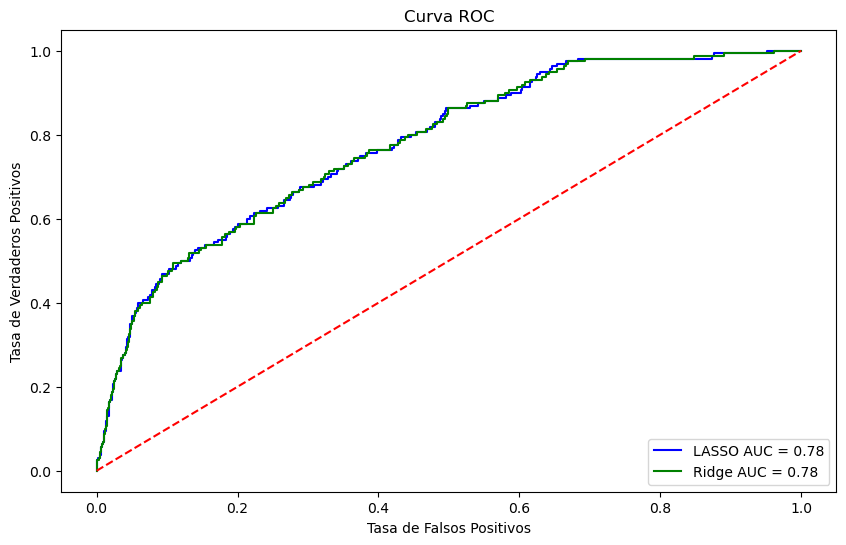

In [195]:
y_prob_lasso = model_lasso.predict_proba(X_test)[:, 1]
y_prob_ridge = model_ridge.predict_proba(X_test)[:, 1]

# Curva ROC
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_prob_lasso)
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_prob_ridge)

# AUC
auc_lasso = auc(fpr_lasso, tpr_lasso)
auc_ridge = auc(fpr_ridge, tpr_ridge)

# Graficar la curva ROC
plt.figure(figsize=(10,6))
plt.plot(fpr_lasso, tpr_lasso, color='blue', label=f'LASSO AUC = {auc_lasso:.2f}')
plt.plot(fpr_ridge, tpr_ridge, color='green', label=f'Ridge AUC = {auc_ridge:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [196]:
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

print("Accuracy LASSO:", accuracy_lasso)
print("Accuracy Ridge:", accuracy_ridge)

Accuracy LASSO: 0.9263351749539595
Accuracy Ridge: 0.927255985267035


In [197]:
# Definir valores de λ (equivalente a alpha en sklearn)
lambdas = [10**n for n in range(-5, 6)]  # valores de λ desde 10^(-5) hasta 10^5
ridge_errors = []  # Para almacenar los errores de Ridge
lasso_errors = []  # Para almacenar los errores de Lasso

ridge_coefs = []  # Para almacenar coeficientes de Ridge
lasso_proportions = []  # Para almacenar las proporciones de coeficientes nulos (Lasso)

for lambda_value in lambdas:
    # Regresión Ridge
    ridge_model = LogisticRegression(penalty='l2', C=1/lambda_value, solver='liblinear')
    ridge_cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
    ridge_errors.append(-ridge_cv_scores)  # MSE es negativo por la forma en que se calcula, lo revertimos
    
    # Regresión LASSO
    lasso_model = LogisticRegression(penalty='l1', C=1/lambda_value, solver='liblinear')
    lasso_cv_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
    lasso_errors.append(-lasso_cv_scores)
    
    # Para Lasso, calculamos la proporción de coeficientes nulos
    lasso_model.fit(X_train_scaled, y_train)
    lasso_coefs = lasso_model.coef_.flatten()
    lasso_proportion = np.mean(lasso_coefs == 0)  # Proporción de coeficientes cero
    lasso_proportions.append(lasso_proportion)

C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mili\anaconda3\envs\nuevo_entorno\Lib\sit

λ = 1.0e-05 | Ridge Mean MSE = 0.0658 | Ridge Std Dev = 0.0190 | Lasso Mean MSE = 0.0658 | Lasso Std Dev = 0.0190
λ = 1.0e-04 | Ridge Mean MSE = 0.0658 | Ridge Std Dev = 0.0190 | Lasso Mean MSE = 0.0660 | Lasso Std Dev = 0.0190
λ = 1.0e-03 | Ridge Mean MSE = 0.0703 | Ridge Std Dev = 0.0200 | Lasso Mean MSE = 0.0703 | Lasso Std Dev = 0.0200
λ = 1.0e-02 | Ridge Mean MSE = 0.0678 | Ridge Std Dev = 0.0167 | Lasso Mean MSE = 0.0680 | Lasso Std Dev = 0.0168
λ = 1.0e-01 | Ridge Mean MSE = 0.0640 | Ridge Std Dev = 0.0111 | Lasso Mean MSE = 0.0644 | Lasso Std Dev = 0.0109
λ = 1.0e+00 | Ridge Mean MSE = 0.0730 | Ridge Std Dev = 0.2676 | Lasso Mean MSE = 0.0730 | Lasso Std Dev = 0.2676
λ = 1.0e+01 | Ridge Mean MSE = 0.0665 | Ridge Std Dev = 2.8675 | Lasso Mean MSE = 0.0665 | Lasso Std Dev = 2.8675
λ = 1.0e+02 | Ridge Mean MSE = 0.0683 | Ridge Std Dev = 28.8478 | Lasso Mean MSE = 0.0683 | Lasso Std Dev = 28.8478
λ = 1.0e+03 | Ridge Mean MSE = 0.0672 | Ridge Std Dev = 288.6557 | Lasso Mean MSE = 0.

C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\4067470820.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lambda', y='value', data=pd.melt(ridge_errors_df, id_vars='lambda'), palette="Set2")


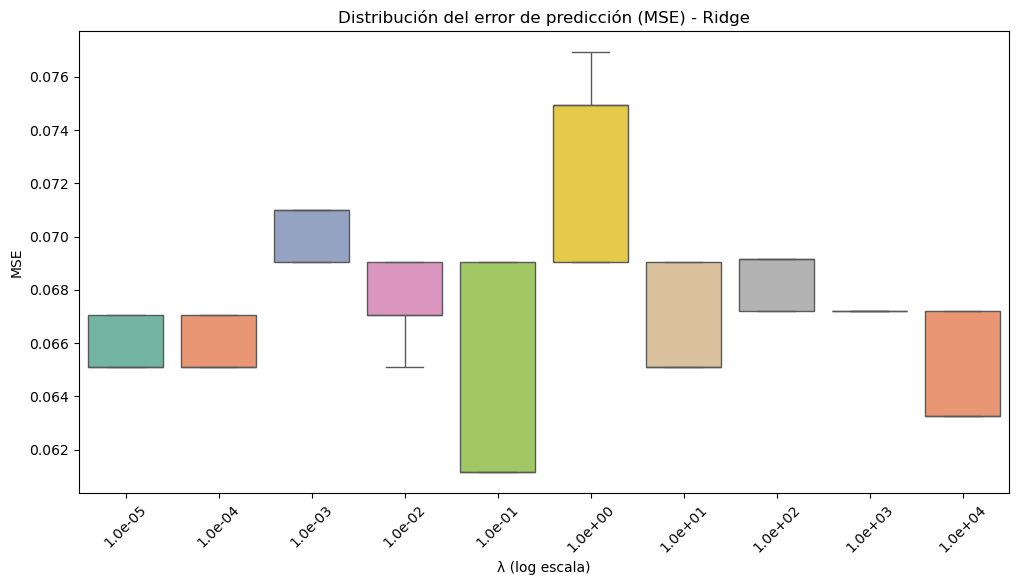

C:\Users\Mili\AppData\Local\Temp\ipykernel_12488\4067470820.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lambda', y='value', data=pd.melt(lasso_errors_df, id_vars='lambda'), palette="Set1")


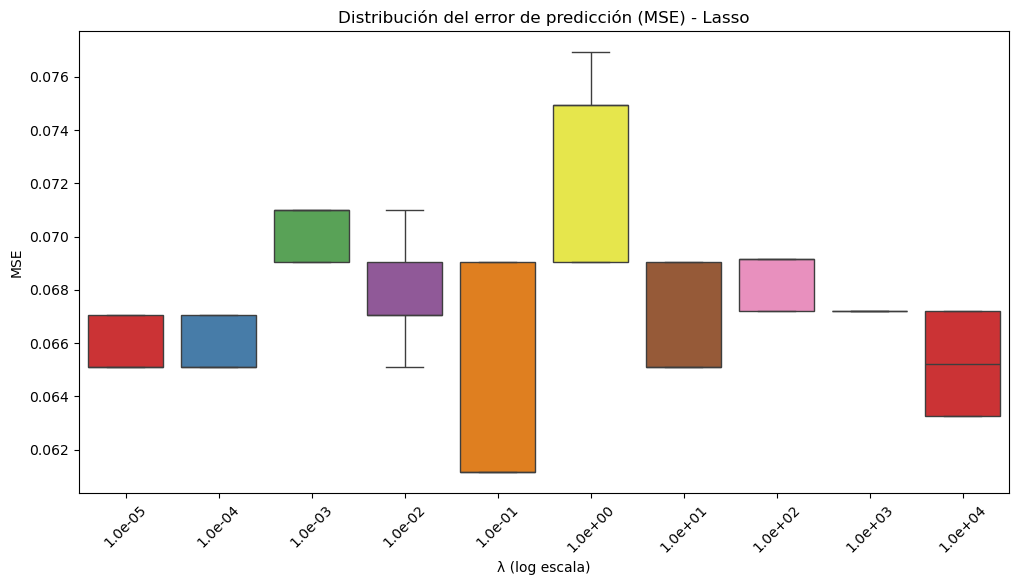

In [198]:
# Convertir los errores a un DataFrame
ridge_errors_df = pd.DataFrame(ridge_errors).T
lasso_errors_df = pd.DataFrame(lasso_errors).T

# Promediar los errores de Ridge y Lasso
ridge_errors_mean = np.mean(ridge_errors_df, axis=1)
lasso_errors_mean = np.mean(lasso_errors_df, axis=1)

# Si lambdas tiene 11 valores, pero solo 10 son utilizados:
lambdas = lambdas[:10]  # Ajustar el tamaño de lambdas a 10

# Ahora agregamos la columna 'lambda' a cada DataFrame
ridge_errors_df['lambda'] = lambdas
lasso_errors_df['lambda'] = lambdas


results_df = pd.DataFrame({
    'Lambda': lambdas,
    'Ridge Mean MSE': ridge_errors_mean,
    'Ridge Std Dev': ridge_errors_df.std(axis=1),
    'Lasso Mean MSE': lasso_errors_mean,
    'Lasso Std Dev': lasso_errors_df.std(axis=1)
})
for index, row in results_df.iterrows():
    print(f"λ = {row['Lambda']:.1e} | Ridge Mean MSE = {row['Ridge Mean MSE']:.4f} | Ridge Std Dev = {row['Ridge Std Dev']:.4f} | "
          f"Lasso Mean MSE = {row['Lasso Mean MSE']:.4f} | Lasso Std Dev = {row['Lasso Std Dev']:.4f}")


# Boxplot de errores de Ridge
plt.figure(figsize=(12, 6))
sns.boxplot(x='lambda', y='value', data=pd.melt(ridge_errors_df, id_vars='lambda'), palette="Set2")
plt.title('Distribución del error de predicción (MSE) - Ridge')
plt.xlabel('λ (log escala)')
plt.ylabel('MSE')
plt.xticks(ticks=range(len(lambdas)), labels=[f'{x:.1e}' for x in lambdas], rotation=45)
plt.show()

# Boxplot de errores de Lasso
plt.figure(figsize=(12, 6))
sns.boxplot(x='lambda', y='value', data=pd.melt(lasso_errors_df, id_vars='lambda'), palette="Set1")
plt.title('Distribución del error de predicción (MSE) - Lasso')
plt.xlabel('λ (log escala)')
plt.ylabel('MSE')
plt.xticks(ticks=range(len(lambdas)), labels=[f'{x:.1e}' for x in lambdas], rotation=45)
plt.show()

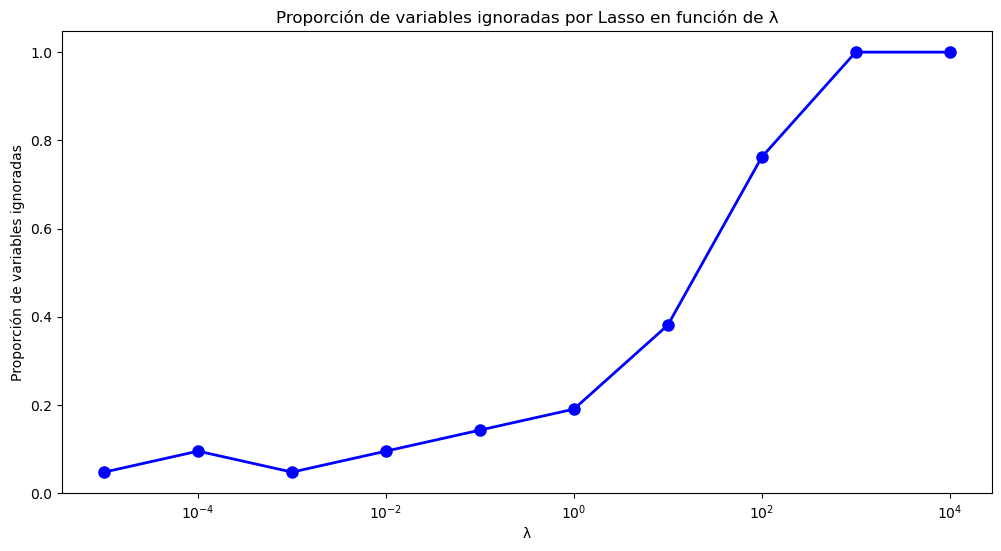

In [199]:
min_len = min(len(lambdas), len(lasso_proportions))
lambdas = lambdas[:min_len]
lasso_proportions = lasso_proportions[:min_len]

# Ahora, puedes hacer el gráfico
plt.figure(figsize=(12, 6))
plt.plot(lambdas, lasso_proportions, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xscale('log')
plt.title('Proporción de variables ignoradas por Lasso en función de λ')
plt.xlabel('λ')
plt.ylabel('Proporción de variables ignoradas')
plt.show()

In [200]:
optimal_lambda_index = np.argmin(lasso_errors_mean)  # Índice del λ que minimiza el error
optimal_lambda = lambdas[optimal_lambda_index]  # El valor de λ óptimo

# Ahora entrenamos el modelo Lasso con el valor óptimo de λ
lasso_model_optimal = LogisticRegression(penalty='l1', C=1/optimal_lambda, solver='liblinear')
lasso_model_optimal.fit(X_train_scaled, y_train)

# Obtener los coeficientes del modelo
lasso_coefs = lasso_model_optimal.coef_.flatten()

# Identificar las variables cuyo coeficiente es 0 (es decir, las descartadas)
discarded_variables = df_prediccion_2004.columns[lasso_coefs == 0]

# Imprimir las variables descartadas
print(f"Variables descartadas por Lasso con λ = {optimal_lambda}:")
print(discarded_variables)


Variables descartadas por Lasso con λ = 0.1:
Index(['componente', 'varon', 'prim_inc'], dtype='object')


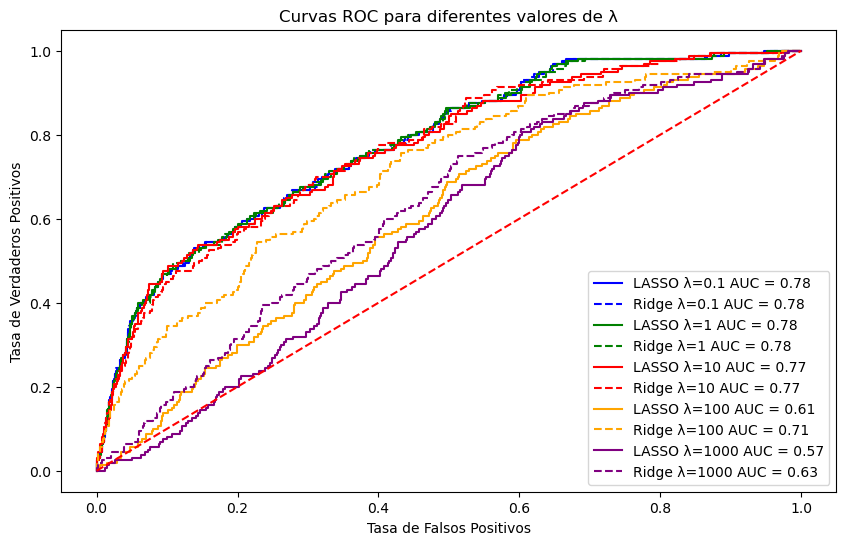

In [201]:
# Definir diferentes valores de λ (esto se traduce en diferentes valores de C)
lambdas = [0.1, 1, 10, 100, 1000]
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Inicializar el gráfico
plt.figure(figsize=(10,6))

for i, lambda_value in enumerate(lambdas):
    # LASSO (L1 regularization)
    model_lasso = LogisticRegression(penalty='l1', C=1/lambda_value, solver='liblinear', random_state=101)
    model_lasso.fit(X_train, y_train)

    # Ridge (L2 regularization)
    model_ridge = LogisticRegression(penalty='l2', C=1/lambda_value, solver='liblinear', random_state=101)
    model_ridge.fit(X_train, y_train)

    # Predicciones
    y_prob_lasso = model_lasso.predict_proba(X_test)[:, 1]
    y_prob_ridge = model_ridge.predict_proba(X_test)[:, 1]

    # Curva ROC
    fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_prob_lasso)
    fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_prob_ridge)

    # AUC
    auc_lasso = auc(fpr_lasso, tpr_lasso)
    auc_ridge = auc(fpr_ridge, tpr_ridge)

    # Graficar la curva ROC para LASSO y Ridge
    plt.plot(fpr_lasso, tpr_lasso, color=colors[i], label=f'LASSO λ={lambda_value} AUC = {auc_lasso:.2f}')
    plt.plot(fpr_ridge, tpr_ridge, color=colors[i], linestyle='--', label=f'Ridge λ={lambda_value} AUC = {auc_ridge:.2f}')

# Línea diagonal (para referencia)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  

# Etiquetas y título
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para diferentes valores de λ')
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()